[Nh√≥m 2 - Github link](https://github.com/kolee1902/APP_Changing_Image_Background_UNET)

Th√†nh vi√™n NH√ìM 2:

- 21127129 - L√™ Nguy·ªÖn Ki·ªÅu Oanh  
- 21127104 - ƒêo√†n Ng·ªçc Mai  


# **CSC14116 - Changing image background using UNET**

## **Framework Project**

---

### üìå 1. Gi·ªõi thi·ªáu

Trong lƒ©nh v·ª±c x·ª≠ l√Ω ·∫£nh, ƒë·∫∑c bi·ªát l√† b√†i to√°n **ph√¢n ƒëo·∫°n ·∫£nh (image segmentation)**, vi·ªác t√°ch ti·ªÅn c·∫£nh (foreground) kh·ªèi h·∫≠u c·∫£nh (background) l√† m·ªôt b∆∞·ªõc quan tr·ªçng. Ki·∫øn tr√∫c **U-Net**, ƒë∆∞·ª£c gi·ªõi thi·ªáu l·∫ßn ƒë·∫ßu trong lƒ©nh v·ª±c ·∫£nh sinh h·ªçc, ƒë√£ ch·ª©ng minh hi·ªáu qu·∫£ v∆∞·ª£t tr·ªôi cho c√°c b√†i to√°n segmentation m√† kh√¥ng c·∫ßn m·ªôt l∆∞·ª£ng l·ªõn d·ªØ li·ªáu hu·∫•n luy·ªán.

---

### üß† 2. Ki·∫øn tr√∫c U-Net

Ki·∫øn tr√∫c U-Net g·ªìm ba th√†nh ph·∫ßn ch√≠nh:

* **Encoder (Contracting Path)**: Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng v·ªõi c√°c l·ªõp t√≠ch ch·∫≠p (convolution) v√† gi·∫£m k√≠ch th∆∞·ªõc (max pooling).
* **Decoder (Expanding Path)**: TƒÉng k√≠ch th∆∞·ªõc ·∫£nh ƒë·∫ßu ra b·∫±ng c√°c l·ªõp up-convolution (deconvolution) ƒë·ªÉ t√°i t·∫°o l·∫°i ph√¢n v√πng ·∫£nh.
* **Skip Connections**: Gi√∫p gi·ªØ l·∫°i th√¥ng tin chi ti·∫øt (v√≠ d·ª•: bi√™n ·∫£nh) b·∫±ng c√°ch k·∫øt n·ªëi tr·ª±c ti·∫øp encoder v·ªõi decoder t·∫°i c√°c t·∫ßng t∆∞∆°ng ·ª©ng.
* **1x1 Convolution cu·ªëi c√πng**: D·ª± ƒëo√°n ph√¢n l·ªõp tr√™n t·ª´ng pixel.

```
Encoder (‚Üì):        Input -> Conv -> ReLU -> Conv -> ReLU -> MaxPool
Decoder (‚Üë):        UpConv -> Concatenate (skip) -> Conv -> ReLU -> Conv -> ReLU
```

#### üîß C·∫•u tr√∫c t·ªïng qu√°t


![·∫¢nh minh ho·∫°](https://media.geeksforgeeks.org/wp-content/uploads/20220614121231/Group14.jpg)


---

#### üß± Ki·∫øn tr√∫c chi ti·∫øt

| Th√†nh ph·∫ßn     | Chi ti·∫øt                                          |
| -------------- | ------------------------------------------------- |
| Conv layers    | 3x3 padding + ReLU                                |
| MaxPooling     | 2x2                                               |
| Up-convolution | 2x2                                               |
| Output layer   | 1x1 convolution ƒë·ªÉ d·ª± ƒëo√°n ph√¢n l·ªõp t·∫°i m·ªói pixel |

U-Net s·ª≠ d·ª•ng **data augmentation m·∫°nh m·∫Ω** (flip, rotation, shift, elastic deformation) ƒë·ªÉ t·∫°o ra nhi·ªÅu m·∫´u t·ª´ ·∫£nh g·ªëc ‚Äì ƒëi·ªÅu n√†y gi√∫p gi·∫£i quy·∫øt v·∫•n ƒë·ªÅ thi·∫øu d·ªØ li·ªáu.

---

### üõ†Ô∏è 3. ·ª®ng d·ª•ng U-Net cho Project Change Background

#### üéØ M·ª•c ti√™u

S·ª≠ d·ª•ng U-Net ƒë·ªÉ **t√°ch l·ªõp foreground (ng∆∞·ªùi, v·∫≠t th·ªÉ ch√≠nh)** kh·ªèi ·∫£nh, sau ƒë√≥ **thay th·∫ø background** b·∫±ng m·ªôt ·∫£nh m·ªõi.

---

#### üîß Framework t·ªïng quan

---

#### üö∂‚Äç‚ôÇÔ∏è B∆∞·ªõc 1: Chu·∫©n b·ªã D·ªØ li·ªáu

* **Input**: H√¨nh ·∫£nh RGB ch·ª©a ng∆∞·ªùi ho·∫∑c v·∫≠t th·ªÉ ch√≠nh c·∫ßn gi·ªØ l·∫°i.
* **Resize** ·∫£nh v·ªÅ k√≠ch th∆∞·ªõc c·ªë ƒë·ªãnh (th∆∞·ªùng l√† `256x256`).
* **Normalize** pixel trong kho·∫£ng `[0, 1]`.

---

#### üß† B∆∞·ªõc 2: D·ª± ƒëo√°n Mask b·∫±ng U-Net

* M√¥ h√¨nh U-Net ƒë∆∞·ª£c **load t·ª´ tr·ªçng s·ªë ƒë√£ hu·∫•n luy·ªán** ho·∫∑c **hu·∫•n luy·ªán l·∫°i** t·ª´ ƒë·∫ßu (n·∫øu d·ªØ li·ªáu ƒë·ªß).
* Output l√† m·ªôt **binary mask**, n∆°i `1` t∆∞∆°ng ·ª©ng v·ªõi foreground (ng∆∞·ªùi), `0` l√† background.

---

#### üß™ B∆∞·ªõc 3: H·∫≠u x·ª≠ l√Ω Mask

* **L√†m m·ªãn mask** b·∫±ng c√°c k·ªπ thu·∫≠t nh∆∞:

  * Morphological operation (erosion/dilation)
  * Gaussian blur
  * Thresholding

> M·ª•c ƒë√≠ch: TƒÉng ƒë·ªô ch√≠nh x√°c bi√™n v√† gi·∫£m nhi·ªÖu.

---

#### ‚úÇÔ∏è B∆∞·ªõc 4: T√°ch foreground

S·ª≠ d·ª•ng mask ƒë·ªÉ gi·ªØ l·∫°i v√πng foreground:

```python
result = input_image * mask[..., np.newaxis]
```

---

#### üåÑ B∆∞·ªõc 5: Ch√®n n·ªÅn m·ªõi

* Load ·∫£nh n·ªÅn m·ªõi (c√≥ c√πng k√≠ch th∆∞·ªõc).
* √Åp d·ª•ng c√¥ng th·ª©c:

```python
output = result + background * (1 - mask[..., np.newaxis])
```

* K·∫øt qu·∫£ l√† m·ªôt ·∫£nh m·ªõi v·ªõi foreground gi·ªØ nguy√™n v√† background ƒë√£ thay ƒë·ªïi.

---

### üß™ 4. ƒê√°nh gi√°

Nh√≥m ch·∫°y c√πng m·ªôt m√¥ h√¨nh v·ªõi d·ªØ li·ªáu ƒë·∫ßu v√†o gi·ªëng nhau cho c·∫£ phi√™n b·∫£n tu·∫ßn t·ª± v√† phi√™n b·∫£n song song (d√πng multiprocessing). Sau ƒë√≥, nh√≥m so s√°nh ƒë·ªô ch√≠nh x√°c (accuracy) c·ªßa hai m√¥ h√¨nh.

Ngo√†i ra, nh√≥m c√≥ th·ªÉ s·ª≠ d·ª•ng c√°c ti√™u ch√≠ ƒë√°nh gi√° ph·ªï bi·∫øn:

| Ch·ªâ s·ªë             | Gi·∫£i th√≠ch                                          |
| ------------------ | --------------------------------------------------- |
| **IoU**            | M·ª©c ƒë·ªô ch·ªìng l·∫•p gi·ªØa mask d·ª± ƒëo√°n v√† ground truth  |
| **Dice Score**     | T·ª∑ l·ªá ch√≠nh x√°c gi·ªØa v√πng foreground ƒë∆∞·ª£c ph√¢n ƒëo·∫°n |
| **Pixel Accuracy** | T·ª∑ l·ªá pixel ƒë∆∞·ª£c ph√¢n lo·∫°i ƒë√∫ng                     |

### üìå 5. V√¨ sao l·∫°i l·ª±a ch·ªçn U-Net?

U-Net l√† m·ªôt m√¥ h√¨nh m·∫°nh m·∫Ω v√† ƒë∆°n gi·∫£n cho b√†i to√°n segmentation. Khi √°p d·ª•ng v√†o project thay background ·∫£nh:

* M√¥ h√¨nh c√≥ th·ªÉ t√°ch ch√≠nh x√°c foreground, gi√∫p thay background m∆∞·ª£t m√†.
* C√≥ th·ªÉ k·∫øt h·ª£p th√™m c√°c k·ªπ thu·∫≠t x·ª≠ l√Ω ·∫£nh c·ªï ƒëi·ªÉn ƒë·ªÉ c·∫£i thi·ªán ƒë·∫ßu ra.
* U-Net pretrained c√≥ th·ªÉ d√πng v·ªõi c√°c t·∫≠p d·ªØ li·ªáu segmentation th√¥ng d·ª•ng nh∆∞ COCO, Pascal VOC, ho·∫∑c t·ª± thu th·∫≠p n·∫øu ph√π h·ª£p.

---

### üìö Tham kh·∫£o

* Ronneberger et al., *U-Net: Convolutional Networks for Biomedical Image Segmentation*, [arXiv:1505.04597](https://arxiv.org/pdf/1505.04597v1)
* [https://towardsdatascience.com/understanding-u-net-61276b10f360/](https://towardsdatascience.com/understanding-u-net-61276b10f360/)
* [https://github.com/milesial/Pytorch-UNet](https://github.com/milesial/Pytorch-UNet)

---

## **H∆∞·ªõng ti·∫øp c·∫≠n**
D·ª±a tr√™n 2 b∆∞·ªõc ch√≠nh:
1. C√†i ƒë·∫∑t qu√° tr√¨nh feedforward v·ªõi b·ªô tr·ªçng s·ªë ƒë√£ hu·∫•n luy·ªán c·ªßa m√¥ h√¨nh U-Net ƒë·ªÉ gi·∫£i quy·∫øt b√†i to√°n human segmentation.

   C√°c **t·∫ßng layer ch√≠nh**: **`Conv2d`, `BatchNormalization`, `Activation('relu')`, `MaxPool2D`, `Conv2dTranspose`, `Activation('sigmoid')`**

   Ngo√†i ra c√≤n c√≥ h√†m Concatenation.

2. Thay th·∫ø c√°c pixel thu·ªôc l·ªõp background v·ªõi h√¨nh ·∫£nh ng∆∞·ªùi d√πng mu·ªën thay th·∫ø.

**Tu·∫ßn t·ª±:** vi·∫øt code cho c√°c layer s·ª≠ d·ª•ng numpy.

**Song song:** s·ª≠ d·ª•ng numba ƒë·ªÉ t·ªëi ∆∞u h√≥a code tu·∫ßn t·ª±.     



![image](https://static-cse.canva.com/blob/1825425/tools-feature_photo_background_change_hero_mobile.5500ff56.jpg)

_·∫¢nh k·∫øt qu·∫£ khi x√°c ƒë·ªãnh pixel c·ªßa ng∆∞·ªùi d√πng m√¥ h√¨nh U-Net_

*Ngu·ªìn ·∫£nh*: Google image


## Gi·ªõi thi·ªáu m√¥ h√¨nh tham chi·∫øu d√πng ƒë·ªÉ ƒë√°nh gi√° ƒë·ªô ch√≠nh x√°c c·ªßa Project

Trong project n√†y, nh√≥m s·ª≠ d·ª•ng l·∫°i m√¥ h√¨nh **U-Net** ƒë√£ ƒë∆∞·ª£c hu·∫•n luy·ªán s·∫µn t·ª´ m·ªôt ngu·ªìn ƒë√°ng tin c·∫≠y nh·∫±m l√†m **m·ªëc tham chi·∫øu** ƒë·ªÉ **ƒë√°nh gi√° ƒë·ªô ch√≠nh x√°c** cho m√¥ h√¨nh nh√≥m x√¢y d·ª±ng. C·ª• th·ªÉ, m√¥ h√¨nh ƒë∆∞·ª£c l·∫•y t·ª´ [notebook c·ªßa Kiranshahi tr√™n Kaggle](https://www.kaggle.com/code/kiranshahi/unet-implementation/notebook), n∆°i cung c·∫•p m·ªôt implementation r√µ r√†ng v√† chu·∫©n m·ª±c c·ªßa U-Net cho b√†i to√°n ph√¢n ƒëo·∫°n ng∆∞·ªùi.

M√¥ h√¨nh U-Net n√†y s·ª≠ d·ª•ng ki·∫øn tr√∫c **encoder‚Äìdecoder ƒë·ªëi x·ª©ng** v·ªõi c√°c **skip connection** (n·ªëi t·∫Øt) ƒë·ªÉ gi·ªØ l·∫°i c√°c ƒë·∫∑c tr∆∞ng chi ti·∫øt trong qu√° tr√¨nh gi·∫£i m√£, v√† ƒë√£ ƒë∆∞·ª£c hu·∫•n luy·ªán v·ªõi t·∫≠p d·ªØ li·ªáu ·∫£nh ng∆∞·ªùi v√† m·∫∑t n·∫° t∆∞∆°ng ·ª©ng. M√¥ h√¨nh n√†y ƒë∆∞·ª£c l∆∞u d∆∞·ªõi d·∫°ng file **`unet.h5`**, bao g·ªìm to√†n b·ªô ki·∫øn tr√∫c v√† tham s·ªë ƒë√£ h·ªçc.

Trong project c·ªßa nh√≥m, ch√∫ng t√¥i **t·∫£i l·∫°i m√¥ h√¨nh U-Net n√†y v√† s·ª≠ d·ª•ng n√≥ l√†m baseline** ƒë·ªÉ:

* So s√°nh ƒë·ªô ch√≠nh x√°c ph√¢n ƒëo·∫°n gi·ªØa m√¥ h√¨nh g·ªëc v√† m√¥ h√¨nh do nh√≥m t·ª± x√¢y d·ª±ng,
* V√† **t√°i s·ª≠ d·ª•ng c√°c tr·ªçng s·ªë ƒë√£ hu·∫•n luy·ªán s·∫µn** nh·∫±m gi·∫£m th·ªùi gian hu·∫•n luy·ªán t·ª´ ƒë·∫ßu.

ƒêi·ªÉm quan tr·ªçng l√†: **m·ª•c ti√™u ch√≠nh c·ªßa nh√≥m kh√¥ng ph·∫£i l√† c·∫£i thi·ªán ƒë·ªô ch√≠nh x√°c**, m√† l√† **thi·∫øt k·∫ø l·∫°i pipeline v√† c·∫£i ti·∫øn hi·ªáu su·∫•t th·ª±c thi** (ch·∫≥ng h·∫°n nh∆∞ song song h√≥a c√°c l·ªõp m·∫°ng ho·∫∑c tƒÉng t·ªëc inference). Do ƒë√≥, vi·ªác s·ª≠ d·ª•ng m√¥ h√¨nh c√≥ s·∫µn gi√∫p nh√≥m t·∫≠p trung v√†o c·∫£i ti·∫øn hi·ªáu su·∫•t m√† v·∫´n ƒë·∫£m b·∫£o k·∫øt qu·∫£ ƒë·∫ßu ra c√≥ th·ªÉ ƒë√°nh gi√° ƒë∆∞·ª£c m·ªôt c√°ch kh√°ch quan.


### 1. Ki·∫øn tr√∫c m√¥ h√¨nh

M√¥ h√¨nh U-Net c√≥ c·∫•u tr√∫c ƒë·ªëi x·ª©ng d·∫°ng ch·ªØ U v·ªõi:

* **Encoder**: gi·∫£m k√≠ch th∆∞·ªõc v√† tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng v·ªõi Conv2D + MaxPooling.
* **Decoder**: kh√¥i ph·ª•c l·∫°i k√≠ch th∆∞·ªõc ·∫£nh v·ªõi Conv2DTranspose + skip connections.
* **Output**: l·ªõp Conv2D (1√ó1) v·ªõi `sigmoid`, tr·∫£ v·ªÅ m·∫∑t n·∫° nh·ªã ph√¢n.

### 2. D·ªØ li·ªáu hu·∫•n luy·ªán

S·ª≠ d·ª•ng b·ªô d·ªØ li·ªáu t·ª´ Kaggle, g·ªìm ·∫£nh RGB v√† m·∫∑t n·∫° nh·ªã ph√¢n (grayscale), t·∫•t c·∫£ ƒë∆∞·ª£c resize v·ªÅ k√≠ch th∆∞·ªõc **256√ó256**, chu·∫©n h√≥a v·ªÅ \[0, 1], v√† chia th√†nh **80% train ‚Äì 20% validation**.

[Dataset Link](https://www.kaggle.com/datasets/nikhilroxtomar/person-segmentation)
B·ªô d·ªØ li·ªáu g·ªìm ·∫£nh ch·ª©a ng∆∞·ªùi v√† binary mask. C·∫•u tr√∫c th∆∞ m·ª•c:

*   images
*   masks
*   segmentation: ch·ª©a c√°c file csv ƒë·ªÉ ph√¢n chia t·∫≠p train, validation

### 3. Th√¥ng s·ªë hu·∫•n luy·ªán

* **Batch size**: 8
* **Epochs**: 10
* **Learning rate**: 1e-4
* **Optimizer**: Adam
* **Loss**: Binary Crossentropy
* **ƒê√°nh gi√°**: Mean IoU, Recall, Precision

### 4. C√°c h√†m ch√≠nh

* `conv_block`: T·∫°o kh·ªëi Conv2D + BatchNorm + ReLU
* `encoder_block` / `decoder_block`: T·∫°o encoder/decoder v·ªõi pooling ho·∫∑c transpose
* `build_unet`: K·∫øt h·ª£p c√°c block ƒë·ªÉ t·∫°o ki·∫øn tr√∫c U-Net
* `load_data`, `read_image`, `read_mask`: X·ª≠ l√Ω d·ªØ li·ªáu ƒë·∫ßu v√†o
* `tf_dataset`: T·∫°o pipeline hu·∫•n luy·ªán v·ªõi `tf.data.Dataset`

T·∫•t c·∫£ c√°c th√†nh ph·∫ßn ƒë∆∞·ª£c thi·∫øt k·∫ø theo h∆∞·ªõng module h√≥a, d·ªÖ qu·∫£n l√Ω v√† m·ªü r·ªông.




## Phi√™n b·∫£n 1: C√†i ƒë·∫∑t tu·∫ßn t·ª±

Thu·∫≠t to√°n ƒë∆∞·ª£c tri·ªÉn khai b·∫±ng **Python thu·∫ßn**, s·ª≠ d·ª•ng v√≤ng l·∫∑p `for` v√† c√¢u l·ªánh `if`.

Nh√≥m s·∫Ω so s√°nh **hai phi√™n b·∫£n**:

* Kh√¥ng d√πng `@jit`: ch·∫°y ch·∫≠m do kh√¥ng ƒë∆∞·ª£c t·ªëi ∆∞u.
* C√≥ d√πng `@jit` (t·ª´ th∆∞ vi·ªán `numba`): gi√∫p **tƒÉng t·ªëc r√µ r·ªát** nh·ªù bi√™n d·ªãch m√£ m√°y t·∫°i th·ªùi ƒëi·ªÉm ch·∫°y.

So s√°nh n√†y cho th·∫•y l·ª£i √≠ch c·ªßa t·ªëi ∆∞u h√≥a b·∫±ng JIT v·ªõi c√°c thu·∫≠t to√°n tu·∫ßn t·ª±.



### Thi·∫øt k·∫ø

**√ù t∆∞·ªüng ch√≠nh:**
* T√≠nh k√≠ch th∆∞·ªõc v√† kh·ªüi t·∫°o ma tr·∫≠n output.
* S·ª≠ d·ª•ng 3 v√≤ng l·∫∑p t∆∞∆°ng ·ª©ng v·ªõi depth, width, height ƒë·ªÉ duy·ªát v√† t√≠nh k·∫øt qu·∫£ cho t·ª´ng ph·∫ßn t·ª≠ c·ªßa ma tr·∫≠n output.



**Activation("relu")**

C√¥ng th·ª©c: $f(x) = max(0,x)$ \
* K√≠ch th∆∞·ªõc ma tr·∫≠n output = input
* V·ªõi t·ª´ng ph·∫ßn t·ª≠ output: gi√° tr·ªã = 0 n·∫øu x < 0

**MaxPool2D**

MaxPool2D l√† layer d√πng ƒë·ªÉ gi·∫£m k√≠ch th∆∞·ªõc c·ªßa ƒë·∫∑c tr∆∞ng.

*   K√≠ch th∆∞·ªõc ma tr·∫≠n output: $O = \frac{I - poolsize}{stride}+1$ \
 $O$ : output's width/ height \
 $I$ : input's width/ height

* V·ªõi t·ª´ng ph·∫ßn t·ª≠ output: s·ª≠ d·ª•ng 2 d√≤ng for duy·ªát khu v·ª±c filter ƒë·ªÉ t√¨m ƒë∆∞·ª£c gi√° tr·ªã maximum.

![image.png](https://miro.medium.com/max/1400/1*8yfDolcDtTR7lO88J9crag.png)

> *Ngu·ªìn ·∫£nh*: https://medium.com/@PAdhokshaja/simple-cnn-using-numpy-part-iii-relu-max-pooling-softmax-c03a3377eaf2

**Convolution 2D**

Convolution (l·ªõp t√≠ch ch·∫≠p) l√† l·ªõp tr√≠ch xu·∫•t c√°c ƒë·∫∑c t√≠nh t·ª´ h√¨nh ·∫£nh. B·∫±ng c√°ch tr∆∞·ª£t d·∫ßn b·ªô l·ªçc theo chi·ªÅu ngang v√† d·ªçc tr√™n ·∫£nh, ch√∫ng ta s·∫Ω thu ƒë∆∞·ª£c m·ªôt feature map ch·ª©a c√°c ƒë·∫∑c tr∆∞ng ƒë∆∞·ª£c tr√≠ch xu·∫•t t·ª´ tr√™n h√¨nh ·∫£nh ƒë·∫ßu v√†o. \
*   K√≠ch th∆∞·ªõc ma tr·∫≠n output: $O = \frac{I - K + 2*padding}{stride}+1$ \
 $O$ : output's width/ height \
 $I$ : input's width/ height \
 $K$ : kernel's width/ height
*   V·ªõi t·ª´ng ph·∫ßn t·ª≠ output: t√≠nh k·∫øt qu·∫£ c·ªßa ph√©p t√≠ch ch·∫≠p ·ª©ng v·ªõi ph·∫ßn t·ª≠ hi·ªán t·∫°i.

<img src="https://i.sstatic.net/CjraE.png"/>

> *Ngu·ªìn ·∫£nh*: https://stackoverflow.com/questions/43306323/keras-conv2d-and-input-channels

**Transpose Convolution 2D**

> *Tham kh·∫£o*: Dive into deep learning, Transposed Convolution, https://d2l.ai/chapter_computer-vision/transposed-conv.html

L·ªõp Tranpose Convolution l√† qu√° tr√¨nh ng∆∞·ª£c l·∫°i c·ªßa l·ªõp Convolution. Convolution: bi·∫øn ƒë·ªïi t·ª´ ·∫£nh sang ƒë·∫∑c tr∆∞ng. Tranpose Convolution: bi·∫øn ƒë·ªïi t·ª´ ƒë·∫∑c tr∆∞ng sang c√°c pixel ·∫£nh

Ngo√†i ra, c√≥ th·ªÉ gia tƒÉng k√≠ch th∆∞·ªõc ƒë·∫∑c tr∆∞ng m·ªôt c√°ch ƒë∆°n gi·∫£n th√¥ng qua Upsampling nh∆∞ng c√≥ th·ªÉ g√¢y m·∫•t m√°t th√¥ng tin.
*   K√≠ch th∆∞·ªõc ma tr·∫≠n output: $O = (I - 1)*stride + K + padding$ \
*   V·ªõi t·ª´ng ph·∫ßn t·ª≠ output: t√≠nh ph√©p t√≠ch ch·∫≠p ƒë·∫£o cho t·ª´ng ph·∫ßn t·ª≠.

![image.png](https://d2l.ai/_images/trans_conv_stride2.svg)

> *Tham kh·∫£o*: Dive into deep learning, Transposed Convolution, https://d2l.ai/chapter_computer-vision/transposed-conv.html

**Batch Normalization**

L·ªõp Batch Normalization d√πng ƒë·ªÉ chu·∫©n h√≥a c√°c gi√° tr·ªã c·ªßa ƒë·∫∑c tr∆∞ng, gi√∫p ·ªïn ƒë·ªãnh v√† tƒÉng t·ªëc hu·∫•n luy·ªán deep learning v√† l√†m cho d·ªØ li·ªáu ƒë·∫ßu v√†o c·ªßa m·ªói l·ªõp c√≥ ph√¢n ph·ªëi chu·∫©n (mean ‚âà 0, var ‚âà 1). Nh√≥m thao kh·∫£o c√¥ng th·ª©c t·∫ßng Batch Normalization c·ªßa [th∆∞ vi·ªán keras](https://keras.io/api/layers/normalization_layers/batch_normalization/)

* K√≠ch th∆∞·ªõc ma tr·∫≠n output = input
* V·ªõi t·ª´ng ph·∫ßn t·ª≠ output: chu·∫©n h√≥a gi√° tr·ªã d·ª±a tr√™n c√¥ng th·ª©c d∆∞·ªõi ƒë√¢y.

C√¥ng th·ª©c:

$$ \frac{\gamma * (x - moving\_mean)}{\sqrt{moving\_var + \epsilon}} + \beta $$

*C√°c h·ªá s·ªë ƒë∆∞·ª£c c·∫≠p nh·∫≠t trong qu√° tr√¨nh h·ªçc*:
* $\gamma$ : h·ªá s·ªë scaling.
* $\beta$ : h·ªá s·ªë offset (x√™ d·ªãch).
* $\epsilon$ : h·∫±ng s·ªë nh·ªè ƒë·ªÉ ƒë·∫£m b·∫£o chia v·ªõi s·ªë kh√¥ng √¢m.
* $ùëöùëúùë£ùëñùëõùëî\_ùëöùëíùëéùëõ$ : l√† tham s·ªë mean ƒë∆∞·ª£c h·ªçc ƒë·ªÉ chu·∫©n h√≥a gi√° tr·ªã.
* $ùëöùëúùë£ùëñùëõùëî\_ùë£ùëéùëü$ : l√† tham s·ªë variance ƒë∆∞·ª£c h·ªçc ƒë·ªÉ chu·∫©n h√≥a gi√° tr·ªã.





**Concatenation**

L·ªõp Concatenation d√πng ƒë·ªÉ t·∫°o skip-connection gi√∫p cho vi·ªác truy·ªÅn gradient v·ªÅ c√°c l·ªõp ƒë·∫ßu t·ªët h∆°n. H√†m n√†y th∆∞·ªùng ƒë∆∞·ª£c d√πng trong ki·∫øn tr√∫c nh∆∞ U-Net, n∆°i c√°c ƒë·∫∑c tr∆∞ng (feature maps) t·ª´ nh√°nh xu·ªëng (skip_features) ƒë∆∞·ª£c n·ªëi v·ªõi c√°c ƒë·∫∑c tr∆∞ng t·ª´ nh√°nh l√™n (x) theo chi·ªÅu k√™nh ƒë·ªÉ gi·ªØ l·∫°i th√¥ng tin kh√¥ng gian ƒë√£ h·ªçc.

* K√≠ch th∆∞·ªõc ma tr·∫≠n output: $(1, InputWidth, InputHeight, InputDepth*2)$
* V·ªõi t·ª´ng ph·∫ßn t·ª≠: g√°n th√†nh gi√° tr·ªã c·ªßa feature map ho·∫∑c skip-features d·ª±a v√†o ch·ªâ s·ªë hi·ªán t·∫°i c·ªßa depth



### C√†i ƒë·∫∑t

#### Th√™m th∆∞ vi·ªán v√† li√™n k·∫øt drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CSC14116-LTSSUD

/content/drive/MyDrive/CSC14116-LTSSUD


In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

import math
from time import time
from numba import jit, prange, config, cuda, float32
import pandas as pd

import os
import keras
from PIL import Image

In [ ]:
def read_image(path):
    original_img = cv2.imread(path, cv2.IMREAD_COLOR)
    h, w, d = original_img.shape
    x = cv2.resize(original_img, (256, 256))
    x = x/255.0
    x = x.astype(np.float32)
    # (256, 256, 3)
    return x, w, h, original_img

In [ ]:
# Read input and build model
x, x_w, x_h, original_img = read_image("./Images/zoom5.jpg")
x = np.expand_dims(x, axis=0)

Ch·∫°y th·ª≠ m√¥ h√¨nh c√≥ s·∫µn v√† l∆∞u l·∫°i output cu·ªëi c√πng

In [ ]:
# Load model
model = keras.models.load_model("./Model_27/unet.h5")

# Load ·∫£nh g·ªëc
img_path = "./Images/zoom5.jpg"
img_orig = cv2.imread(img_path)
if img_orig is None:
    raise FileNotFoundError(f"Kh√¥ng t√¨m th·∫•y ·∫£nh t·∫°i {img_path}")

# L∆∞u l·∫°i k√≠ch th∆∞·ªõc g·ªëc
original_size = (img_orig.shape[1], img_orig.shape[0])  # (width, height)

# Resize ·∫£nh v·ªÅ k√≠ch th∆∞·ªõc input c·ªßa model (gi·∫£ s·ª≠ 256x256)
input_size = (256, 256)
img_resized = cv2.resize(img_orig, input_size)
img_input = img_resized.astype("float32") / 255.0
img_input = np.expand_dims(img_input, axis=0)  # shape: (1, 256, 256, 3)

# D·ª± ƒëo√°n mask
pred_mask = model.predict(img_input)[0]  # shape: (256, 256, 1)
pred_mask = (pred_mask > 0.5).astype(np.uint8)  # ng∆∞·ª°ng nh·ªã ph√¢n h√≥a
pred_mask = cv2.resize(pred_mask, original_size)  # resize mask v·ªÅ k√≠ch th∆∞·ªõc g·ªëc

# √Åp mask l√™n ·∫£nh g·ªëc ƒë·ªÉ gi·ªØ l·∫°i ng∆∞·ªùi
foreground = img_orig.copy()
foreground[pred_mask == 0] = 0  # ƒë·∫∑t background th√†nh tr·∫Øng

# L∆∞u ·∫£nh k·∫øt qu·∫£
save_path = "./Images/unet.jpg"
cv2.imwrite(save_path, foreground)
print(f"ƒê√£ l∆∞u ·∫£nh t√°ch n·ªÅn t·∫°i: {save_path}")

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 7s/step
ƒê√£ l∆∞u ·∫£nh t√°ch n·ªÅn t·∫°i: ./Images/unet.jpg


In [ ]:
import matplotlib.pyplot as plt

# ƒê·ªçc l·∫°i ·∫£nh g·ªëc v√† ·∫£nh ƒë√£ t√°ch n·ªÅn (d√πng matplotlib n√™n ph·∫£i chuy·ªÉn t·ª´ BGR -> RGB)
img_orig_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
img_result = cv2.imread(save_path)
img_result_rgb = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)

# Hi·ªÉn th·ªã hai ·∫£nh c·∫°nh nhau
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_orig_rgb)
plt.title("·∫¢nh g·ªëc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_result_rgb)
plt.title("·∫¢nh sau t√°ch n·ªÅn (U-Net)")
plt.axis("off")

plt.tight_layout()
plt.show()

Ch·∫°y m√¥ h√¨nh c√≥ s·∫µn v√† l∆∞u l·∫°i c√°c output c·ªßa t·ª´ng layer v√†o m·ªôt list.

In [ ]:
from tensorflow.keras.models import Model

inp = model.input                                       # input placeholder
outputs = [layer.output for layer in model.layers]      # all layer outputs

# T·∫°o model trung gian ƒë·ªÉ tr·∫£ v·ªÅ t·∫•t c·∫£ output
functors = Model(inputs=inp, outputs=outputs)

# Truy·ªÅn ·∫£nh input (x) ƒë√£ chu·∫©n h√≥a v√† c√≥ shape (1, 256, 256, 3)
layer_outs = functors.predict(x)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2s/step


ƒê·ªãnh nghƒ©a h√†m **`check()`** d√πng ƒë·ªÉ ƒëo th·ªùi gian th·ª±c thi c·ªßa c√°c t·∫ßng

In [ ]:
def check(func, *arg):
    start = time()
    result = func(*arg)
    end = time()
    t = end - start
    return result, t

time_compile = np.zeros(7, dtype=float)
time_run = np.zeros(7, dtype=float)
time_unet = np.zeros(7, dtype=float)
time_parallel = np.zeros(7, dtype=float)
func = ['Relu', 'Sigmoid', 'Maxpool2D', 'Conv2D',
        'Conv2D Transpose', 'Batch Norm', 'Concat']

#### Activation("relu")

In [ ]:
# @jit(cache=True)
@jit()
def relu(x):
    for d in range(x.shape[3]):
        for i in range(x.shape[1]):
            for j in range(x.shape[2]):
                if x[0,i,j,d]<0:
                    x[0,i,j,d]=0
    return x

In [ ]:
# Check  answer
before = np.array(layer_outs[2])
after = np.array(layer_outs[3])

i = 0
res, t = check(relu, before)
time_compile[i] += t
print("Checking difference:", np.abs(res-after).mean())

Checking difference: 0.0


In [ ]:
_, t = check(relu, before)
time_run[i] += t

#### Activation("sigmoid")

In [ ]:
# @jit(cache=True)
@jit()
def sigmoid(x):
    for d in range(x.shape[3]):
        for i in range(x.shape[1]):
            for j in range(x.shape[2]):
                x[0,i,j,d]= 1 / (1 + np.exp(-x[0,i,j,d]))
    return x

In [ ]:
before = np.array(layer_outs[2])
after = 1 / (1 + np.exp(-layer_outs[2]))

i += 1
res, t = check(sigmoid, before)
time_compile[i] += t
print("Checking difference:", np.abs(res-after).mean())

Checking difference: 1.3765145e-08


In [ ]:
_, t = check(sigmoid, before)
time_run[i] += t

#### MaxPool2D

In [ ]:
# @jit(cache=True)
@jit()
def maxpool2d(x, pool_size = 2,stride = 2):
    # Input dim (1,256,256,3)
    # T√≠nh to√°n k√≠ch th∆∞·ªõc ƒë·∫ßu ra sau khi pooling
    output_width = output_height = int((x.shape[1]-pool_size)/stride)+1
    # Kh·ªüi t·∫°o tensor ch·ª©a k·∫øt qu·∫£ pooling, c√≥ c√πng s·ªë k√™nh v·ªõi ƒë·∫ßu v√†o.
    pooled = np.zeros((1,output_width,output_height,x.shape[3]))

    # Iterate over all pools
    for d in range(x.shape[3]): # Duy·ªát qua t·ª´ng k√™nh m√†u (channel), v√≠ d·ª• R, G, B.
        for i in range(0,x.shape[1], stride):
            for j in range(0, x.shape[2], stride): # Duy·ªát t·ª´ng "v√πng pooling" tr√™n ·∫£nh theo b∆∞·ªõc stride.
                # L·∫•y ra m·ªôt v√πng nh·ªè pool_size x pool_size v√† t√≠nh gi√° tr·ªã l·ªõn nh·∫•t trong v√πng ƒë√≥
                if i+pool_size <= x.shape[1] and j+pool_size <= x.shape[1]:
                    mat = x[:,i:i+pool_size, j:j+pool_size, d]
                    pooled[:,int(i/stride),int(j/stride),d]=np.max(mat) # G√°n v√†o tensor ƒë·∫ßu ra pooled.
                else:
                    raise Exception("Out of index")
    return pooled

In [ ]:
# Check  answer
before = np.array(layer_outs[6])
after = np.array(layer_outs[7])

i += 1
res, t = check(maxpool2d, before)
time_compile[i] = t
print("Checking difference:", np.abs(res-after).mean())

Checking difference: 0.0


In [ ]:
_, t = check(maxpool2d, before)
time_run[i] = t

#### Conv2D

In [ ]:
# @jit(cache=True)
@jit()
def conv2D(input, wei, bias, padding='valid', stride=1):
    # L·∫•y k√≠ch th∆∞·ªõc chi·ªÅu r·ªông, cao, v√† s·ªë k√™nh ƒë·∫ßu v√†o
    w_in, h_in, c_in = input.shape[1], input.shape[2], input.shape[3]
    k = wei.shape[1] # kernel size
    pad = k // 2 if (padding == 'same') else 0
    # T√≠nh k√≠ch th∆∞·ªõc ƒë·∫ßu ra
    w_out = (w_in + 2 * pad - k)//stride + 1
    h_out = (h_in + 2 * pad - k)//stride + 1
    c_out = bias.shape[0]

    # T·∫°o ·∫£nh ƒë√£ padding
    input_pad = np.zeros((1, w_in + 2 * pad, h_in + 2 * pad, c_in)) # Kh·ªüi t·∫°o ·∫£nh m·ªõi
    input_pad[0, pad:(w_in + pad), pad:(h_in + pad), :] = input # Sao ch√©p ·∫£nh g·ªëc v√†o gi·ªØa.

    res=np.zeros((1, w_out, h_out, c_out)) # T·∫°o tensor k·∫øt qu·∫£ ƒë·∫ßu ra

    # Duy·ªát t·ª´ng pixel ƒë·∫ßu ra v√† t√≠nh gi√° tr·ªã b·∫±ng t√≠ch ch·∫≠p
    for x in range(w_out):
        for y in range(h_out):
            for c_o in range(c_out): # Duy·ªát t·ª´ng output channel
                total=0.
                for c_i in range(c_in): # Duy·ªát t·ª´ng input channel
                    kt=0.
                    for k_x in range(k):
                        for k_y in range(k):
                            pos1 = k_x + x * stride
                            pos2 = k_y + y * stride
                            kt += (wei[k_x, k_y, c_i, c_o]
                                        * input_pad[0, pos1, pos2, c_i])
                    total += kt
                res[0, x, y, c_o] = total + bias[c_o]
    return res

In [ ]:
before = np.array(x)
after = np.array(layer_outs[1])
weight = model.layers[1].weights[0].numpy()
bias = model.layers[1].weights[1].numpy()

i += 1
res, t = check(conv2D, before, weight, bias, 'same')
time_compile[i] = t
print("Checking difference:", np.abs(res-after).mean())

Checking difference: 1.0080040055732413e-08


In [ ]:
_, t= check(conv2D, before, weight, bias, 'same')
time_run[i] = t

#### Conv2D Transpose

In [ ]:
# @jit(cache=True)
@jit()
def conv2Dtranspose(input, wei, bias, padding='none', stride=1):
    w_in, h_in, c_in = input.shape[1], input.shape[2], input.shape[3]
    k = wei.shape[1] # kernel size

    w_out = w_in*stride
    h_out = h_in*stride
    c_out = bias.shape[0]
    res = np.zeros((1, w_out, h_out, c_out))

    for c_o in range(c_out):  # Duy·ªát t·ª´ng output channel
        for x in range(w_in):   # Duy·ªát t·ª´ng pixel theo chi·ªÅu r·ªông input
            for y in range(h_in): # Duy·ªát theo chi·ªÅu cao
                ker = np.zeros((k, k)) # T·∫°o m·ªôt patch kernel
                # M·ªói v·ªã tr√≠ (x, y) c·ªßa ·∫£nh ƒë·∫ßu v√†o s·∫Ω t·∫°o ra m·ªôt patch ker ƒë·ªÉ "v·∫Ω" l√™n ·∫£nh ƒë·∫ßu ra
                for c_i in range(c_in):   # Duy·ªát input channels
                    for k_x in range(k):
                        for k_y in range(k):
                            ker[k_x, k_y] += (wei[k_x, k_y, c_o, c_i]
                                                    * input[0, x, y, c_i])
                # T√≠nh tr·ªçng s·ªë cho t·ª´ng ph·∫ßn t·ª≠ kernel theo gi√° tr·ªã t·∫°i (x, y, c_i).
                # C√°c k√™nh input ƒë∆∞·ª£c g·ªôp l·∫°i cho ra 1 k√™nh output
                # G√°n patch kernel (ƒë√£ nh√¢n v√† c·ªông bias) v√†o ƒë√∫ng v·ªã tr√≠ t∆∞∆°ng ·ª©ng trong ·∫£nh ƒë·∫ßu ra.
                res[0, x*stride: x*stride + k,
                    y*stride: y*stride + k, c_o] += ker + bias[c_o]
    return res

In [ ]:
before = np.array(layer_outs[34])
after = np.array(layer_outs[35])
weight = model.layers[35].weights[0].numpy()
bias = model.layers[35].weights[1].numpy()

i += 1
res, t = check(conv2Dtranspose, before, weight, bias, "same", 2)
time_compile[i] = t
print("Checking difference:", np.abs(res-after).mean())

Checking difference: 2.688334480022333e-07


In [ ]:
_, t= check(conv2Dtranspose, before, weight, bias, "same", 2)
time_run[i] = t

#### Batch Normalization

In [ ]:
# @jit(cache=True)
@jit()
def batchNorm(X, gamma, beta, mov_mean, mov_var):
    eps = 0.001
    Y = X.copy()
    for d in range(X.shape[3]): # duy·ªát t·ª´ng channel
        for i in range(X.shape[1]):# duy·ªát theo chi·ªÅu cao
            for j in range(X.shape[2]): # duy·ªát theo chi·ªÅu r·ªông
                Y[0,i,j,d] = beta[d] + (gamma[d]*(X[0,i,j,d]-mov_mean[d])
                                            / np.sqrt(mov_var[d]+eps))
    return Y

In [ ]:
before = np.array(layer_outs[1])
after = np.array(layer_outs[2])

wei = model.layers[2].weights
gamma = wei[0].numpy()
beta = wei[1].numpy()
moving_mean = wei[2].numpy()
moving_var = wei[3].numpy()

i += 1
res, t = check(batchNorm, before, gamma, beta, moving_mean, moving_var)
time_compile[i] = t
print("Checking difference:", np.abs(res-after).mean())

Checking difference: 3.7472667e-08


In [ ]:
_, t= check(batchNorm, before, gamma, beta, moving_mean, moving_var)
time_run[i] = t

#### Concatenation

In [ ]:
# @jit(cache=True)
@jit()
def concat(skip_features, x):
    w_in, h_in, c_in = x.shape[1] ,x.shape[2] ,x.shape[3]
    Y = np.zeros((1,w_in, h_in, c_in*2))
    for d in range(Y.shape[3]):
        for i in range(Y.shape[1]):
            for j in range(Y.shape[2]):
              if d<c_in:
                Y[:,i,j,d] = x[:,i,j,d] # k√™nh ƒë·∫ßu t·ª´ x
              else:
                Y[:,i,j,d] = skip_features[:,i,j,d-c_in] # k√™nh sau t·ª´ skip
    return Y

In [ ]:
before = np.array(layer_outs[59])
after = np.array(layer_outs[60])

i += 1
res, t = check(concat, np.array(layer_outs[6]), before)
time_compile[i] = t
print("Checking difference:", np.abs(res-after).mean())

Checking difference: 0.0


In [ ]:
_, t = check(concat, np.array(layer_outs[6]), before)
time_run[i] = t

### ƒê√°nh gi√°

#### Th·ªùi gian ch·∫°y

**Ch∆∞a th√™m @jit**

In [ ]:
pd.DataFrame(list(zip(func, time_compile, time_run)),
               columns =['Name', 'Compile+Run(s)', 'Run(s)']).sort_values(by=['Run(s)'], ascending=False)

Name  Compile+Run(s)    Run(s)
4  Conv2D Transpose        5.003023  2.787867
6            Concat        0.585413  0.323015
3            Conv2D        2.995303  0.226348
2         Maxpool2D        0.914595  0.079484
1           Sigmoid        0.215732  0.060376
5        Batch Norm        0.218670  0.039223
0              Relu        0.826896  0.014145

In [ ]:
print("T·ªïng th·ªùi gian ch·∫°y tu·∫ßn t·ª± (Compile+Run): ", round(time_compile.sum(), 6), '(s)')
print("T·ªïng th·ªùi gian ch·∫°y tu·∫ßn t·ª± (Run): ", round(time_run.sum(), 6), '(s)')

T·ªïng th·ªùi gian ch·∫°y tu·∫ßn t·ª± (Compile+Run):  10.759632 (s)
T·ªïng th·ªùi gian ch·∫°y tu·∫ßn t·ª± (Run):  3.530458 (s)


**Sau khi th√™m @jit**

In [ ]:
pd.DataFrame(list(zip(func, time_compile, time_run)),
               columns =['Name', 'Compile+Run(s)', 'Run(s)']).sort_values(by=['Run(s)'], ascending=False)

Name  Compile+Run(s)    Run(s)
4  Conv2D Transpose        5.003023  2.787867
6            Concat        0.585413  0.323015
3            Conv2D        2.995303  0.226348
2         Maxpool2D        0.914595  0.079484
1           Sigmoid        0.215732  0.060376
5        Batch Norm        0.218670  0.039223
0              Relu        0.826896  0.014145

In [ ]:
print("T·ªïng th·ªùi gian ch·∫°y tu·∫ßn t·ª± (Compile+Run): ", round(time_compile.sum(), 6), '(s)')
print("T·ªïng th·ªùi gian ch·∫°y tu·∫ßn t·ª± (Run): ", round(time_run.sum(), 6), '(s)')

T·ªïng th·ªùi gian ch·∫°y tu·∫ßn t·ª± (Compile+Run):  10.759632 (s)
T·ªïng th·ªùi gian ch·∫°y tu·∫ßn t·ª± (Run):  3.530458 (s)


### M√¥ h√¨nh U-Net



>  Ngu·ªìn tham kh·∫£o: https://www.kaggle.com/code/kiranshahi/unet-implementation/notebook



L∆∞u to√†n b·ªô tr·ªçng s·ªë m√¥ h√¨nh tham chi·∫øu v√†o dictionary ƒë·ªÉ sau n√†y d√πng custom implementation c·ªßa U-Net

In [ ]:
# load weight to dictionary
weights = {}
for i, layer in enumerate(model.layers):
    if "conv2d_transpose" in layer.name:
        weights[i] = {"name":layer.name,
                      "wei": layer.weights[0].numpy(),
                      "bias": layer.weights[1].numpy()}
    elif "conv2d" in layer.name:
        weights[i] = {"name":layer.name,
                      "wei": layer.weights[0].numpy(),
                      "bias": layer.weights[1].numpy()}
    elif "batch_normalization" in layer.name:
        weights[i] = {"name":layer.name,
                      "gamma":layer.weights[0].numpy(),
                      "beta":layer.weights[1].numpy(),
                      "moving_mean":layer.weights[2].numpy(),
                      "moving_var":layer.weights[3].numpy()}

#### conv_block: kh·ªëi x·ª≠ l√Ω c∆° b·∫£n

- G·ªìm 2 l·∫ßn Conv2D + BatchNorm + ReLU.
- ƒê√¢y l√† kh·ªëi c∆° b·∫£n trong encoder v√† decoder c·ªßa U-Net.
- D√πng ƒë·ªÉ l·ªçc ·∫£nh 2 l·∫ßn li√™n ti·∫øp ƒë·ªÉ l·∫•y ƒë·∫∑c tr∆∞ng r√µ h∆°n.

In [ ]:
def conv_block(inputs, index):
    # First Conv-BN-ReLU
    x, t = check(conv2D, inputs, weights[index]["wei"], weights[index]["bias"], 'same')
    time_unet[3] += t
    x, t = check(batchNorm, x, weights[index+1]["gamma"], weights[index+1]["beta"], weights[index+1]["moving_mean"], weights[index+1]["moving_var"])
    time_unet[5] += t
    x, t = check(relu, x)
    time_unet[0] += t

    # Second Conv-BN-ReLU
    index += 3
    x, t = check(conv2D, x, weights[index]["wei"], weights[index]["bias"], 'same')
    time_unet[3] += t
    x, t = check(batchNorm, x, weights[index+1]["gamma"], weights[index+1]["beta"], weights[index+1]["moving_mean"], weights[index+1]["moving_var"])
    time_unet[5] += t
    x, t = check(relu, x)
    time_unet[0] += t

    return x

#### encoder_block: kh·ªëi m√£ h√≥a (downsampling)

In [ ]:
def encoder_block(inputs, index):
    print("encoder_block", index)
    x = conv_block(inputs, index)
    p, t = check(maxpool2d, x)
    time_unet[2] += t
    return x, p

#### decoder_block: kh·ªëi gi·∫£i m√£ (upsampling)

In [ ]:
def decoder_block(inputs, skip_features, index):
    print("decoder_block",index)
    x, t = check(conv2Dtranspose, inputs, weights[index]["wei"], weights[index]["bias"], "same", 2)
    time_unet[4] += t
    x, t = check(concat, skip_features, x)
    time_unet[6] += t
    x = conv_block(x, index + 2)
    return x

#### X√¢y d·ª±ng m√¥ h√¨nh UNET

In [ ]:
def build_unet(X):
    index = 1 #reading weights from layer 1 in the weights dictionary

    """ ENCODER """
    # Encoder block 1: from original image -> 64 feature maps + maxpool (downscale by 1/2)
    s1, p1 = encoder_block( X, index ) #64
    index += 7 # after one encoder_block, we consume 7 layers -> move index

    # Encoder block 2: from p1 -> 128 feature maps + maxpool (downscale by 1/4)
    s2, p2 = encoder_block( p1, index ) #128
    index += 7

    # Encoder block 3: from p2 -> 256 feature maps + maxpool (downscale by 1/8)
    s3, p3 = encoder_block( p2, index ) #256
    index += 7

    # Encoder block 4: from p3 -> 512 feature maps + maxpool (downscale by 1/16)
    s4, p4 = encoder_block( p3, index ) #512
    index += 7

    # Bottleneck (middle of U-Net): deepest features with 1024 channels, no more pooling
    b1 = conv_block( p4, index ) #1024
    index += 6 # conv_block uses 6 layers (2 conv, 2 BN, 2 relu)

    """ DECODER """
    # Decoder block 1: upsample 1024 -> 512 channels, concatenate with skip s4 (512)
    d1 = decoder_block( b1, s4, index ) #512
    index += 8

    # Decoder block 2: upsample 512 -> 256 channels, concatenate with skip s3 (256)
    d2 = decoder_block( d1, s3, index ) #256
    index += 8

    # Decoder block 3: upsample 256 -> 128 channels, concatenate with skip s2 (128)
    d3 = decoder_block( d2, s2, index ) #128
    index += 8

    # Decoder block 4: upsample 128 -> 64 channels, concatenate with skip s1 (64)
    d4 = decoder_block( d3, s1, index ) #64
    index += 8

    """ OUTPUT """
    # outputs = Conv2D(1, (1, 1), padding="same", activation="sigmoid")(d4)

    # Final layer: Conv2D (1x1) to reduce channels from 64 -> 1 (binary mask)
    flatten, t = check(conv2D, d4, weights[index]["wei"], weights[index]["bias"], "same", 1)
    time_unet[3] += t

    # Apply sigmoid to squash values into [0,1] (for binary mask)
    outputs, t = check(sigmoid, flatten)
    time_unet[1] += t
    return outputs # return the predicted segmentation mask

In [ ]:
%time pred = build_unet(x)

encoder_block 1
encoder_block 8
encoder_block 15
encoder_block 22
decoder_block 35
decoder_block 43
decoder_block 51
decoder_block 59
CPU times: user 3min 26s, sys: 909 ms, total: 3min 27s
Wall time: 3min 27s


### Ti·∫øn h√†nh thay ƒë·ªïi background

In [ ]:
# @jit(cache=True)
@jit()
def change_bg(result, mask, background, width, height, mode):
    # Loop over every pixel in the image
    for w in range(width):
        for h in range(height):
            # If mask value <= 0.5, this pixel is considered background
            if mask[h, w] <= 0.5:
                # Loop over all 3 color channels (R,G,B)
                for c in range(3):
                    if mode == 0: # Mode 0: set background pixels to black
                        result[h, w, c] = 0
                    elif mode == 1: # Mode 1: replace background pixels with new background
                        result[h, w, c] = background[h, w, c]
    return result

In [ ]:
background_path='./Images/background.jpg'
background = cv2.resize(cv2.imread(background_path, cv2.IMREAD_COLOR), (x_w, x_h))
mask = cv2.resize(pred[0], (x_w, x_h))

r = original_img.copy()

%time verify = change_bg(r, mask, background, x_w, x_w, 0)
cv2.imwrite("./Images/sequential.jpg", verify)
result = change_bg(r, mask, background, x_w, x_w, 1)
cv2.imwrite("./Images/sequential_bg.jpg", result)

CPU times: user 150 ms, sys: 992 ¬µs, total: 151 ms
Wall time: 151 ms


True

In [ ]:
%time _ = change_bg(r, mask, background, x_w, x_h, 0)

CPU times: user 2.48 ms, sys: 7 ¬µs, total: 2.49 ms
Wall time: 2.5 ms


(np.float64(-0.5), np.float64(749.5), np.float64(499.5), np.float64(-0.5))

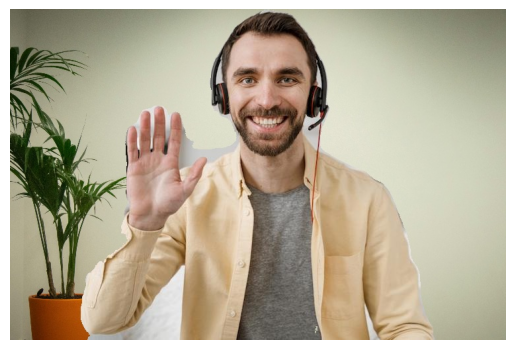

In [ ]:
plt.imshow(cv2.imread("Images/sequential_bg.jpg")[...,::-1]);
plt.axis('off')

### ƒê√°nh gi√° m√¥ h√¨nh

M√¥ h√¨nh ƒë∆∞·ª£c ƒë√°nh gi√° d·ª±a tr√™n **hai ti√™u ch√≠ ch√≠nh**:

1.   **ƒê·ªô ch√≠nh x√°c:** Ki·ªÉm tra xem ƒë·∫ßu ra c·ªßa m√¥ h√¨nh tu·∫ßn t·ª± c√≥ kh·ªõp ho√†n to√†n v·ªõi ƒë·∫ßu ra c·ªßa m√¥ h√¨nh U-Net hay kh√¥ng. ƒê·ªô sai l·ªách trung b√¨nh tuy·ªát ƒë·ªëi gi·ªØa hai ·∫£nh ƒë·∫ßu ra ƒë∆∞·ª£c t√≠nh b·∫±ng NumPy. N·∫øu k·∫øt qu·∫£ l√† 0.0, ƒëi·ªÅu ƒë√≥ cho th·∫•y hai m√¥ h√¨nh cho ƒë·∫ßu ra gi·ªëng h·ªát nhau v·ªÅ m·∫∑t pixel.
2.   **Th·ªùi gian th·ª±c thi:** ƒêo l∆∞·ªùng th·ªùi gian ch·∫°y c·ªßa t·ª´ng l·ªõp trong m√¥ h√¨nh b·∫±ng c√°ch ghi l·∫°i th·ªùi gian bi√™n d·ªãch v√† th·ªùi gian th·ª±c thi th·ª±c t·∫ø. T·ª´ ƒë√≥, c√≥ th·ªÉ x√°c ƒë·ªãnh l·ªõp n√†o chi·∫øm nhi·ªÅu t√†i nguy√™n t√≠nh to√°n nh·∫•t v√† ·∫£nh h∆∞·ªüng ƒë·∫øn hi·ªáu su·∫•t t·ªïng th·ªÉ.

#### ƒê·ªô ch√≠nh x√°c

So s√°nh 2 h√¨nh ·∫£nh ƒë·∫ßu ra t·ª´ m√¥ h√¨nh tu·∫ßn t·ª± v√† m√¥ h√¨nh U-Net

(np.float64(-0.5), np.float64(749.5), np.float64(499.5), np.float64(-0.5))

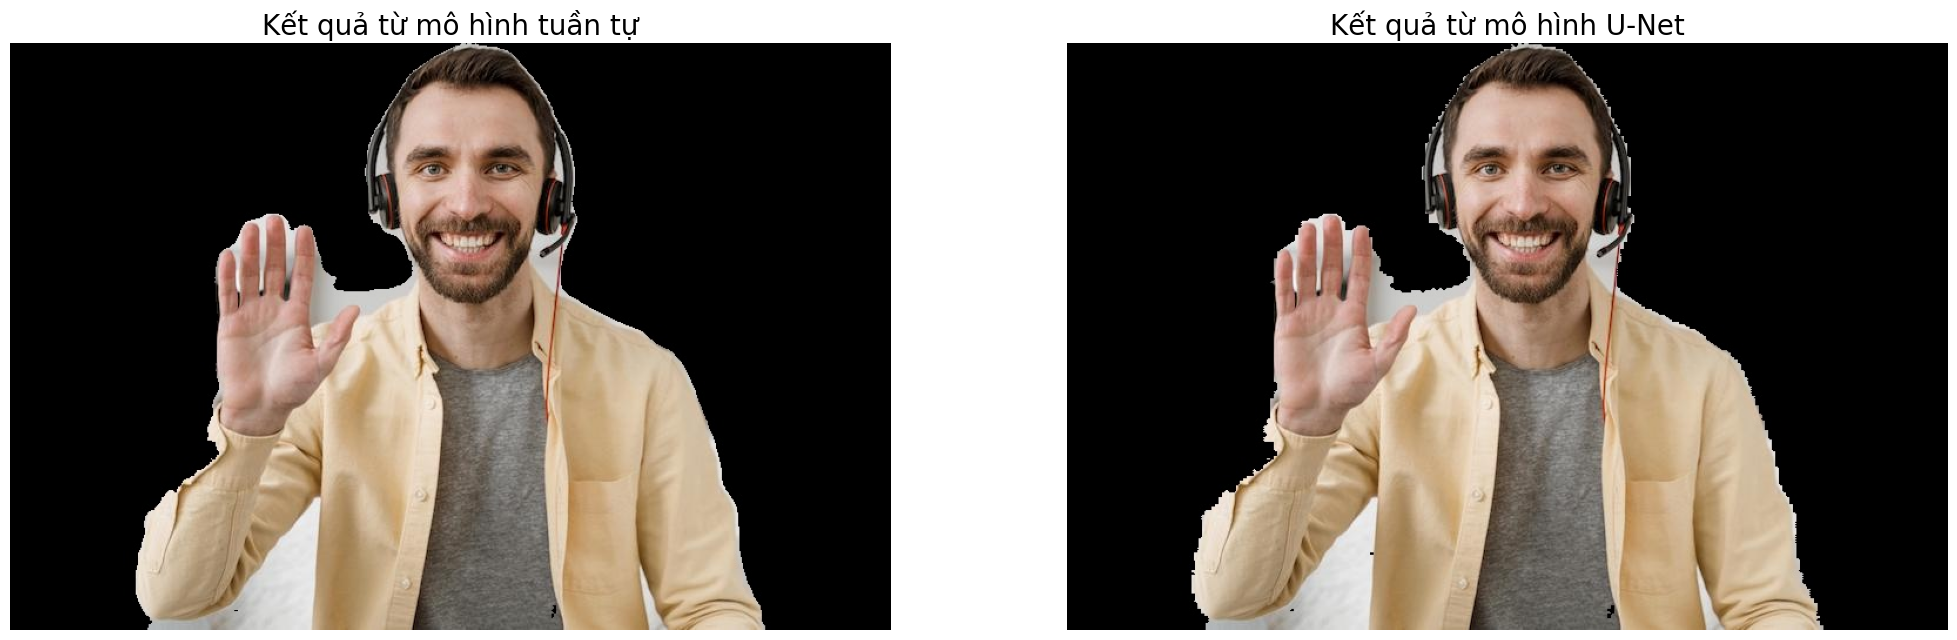

In [ ]:
list_images = [cv2.imread("Images/sequential.jpg")[...,::-1],
               cv2.imread("Images/unet.jpg")[...,::-1]]

fig = plt.figure(figsize=(25, 20))

# ·∫¢nh 1: K·∫øt qu·∫£ m√¥ h√¨nh tu·∫ßn t·ª±
fig.add_subplot(1, 2, 1)
plt.imshow(list_images[0])
plt.title("K·∫øt qu·∫£ t·ª´ m√¥ h√¨nh tu·∫ßn t·ª±", fontsize=20)
plt.axis('off')

# ·∫¢nh 2: K·∫øt qu·∫£ m√¥ h√¨nh U-Net
fig.add_subplot(1, 2, 2)
plt.imshow(list_images[1])
plt.title("K·∫øt qu·∫£ t·ª´ m√¥ h√¨nh U-Net", fontsize=20)
plt.axis('off')

ƒêo ƒë·ªô sai kh√°c trung b√¨nh gi·ªØa hai ·∫£nh ƒë·∫ßu ra

In [ ]:
np.abs(list_images[0]-list_images[1]).mean()

np.float64(4.206027555555556)

##### **Nh·∫≠n x√©t v·ªÅ h√¨nh ·∫£nh ƒë·∫ßu ra**


> Gi√° tr·ªã sai kh√°c trung b√¨nh gi·ªØa hai ·∫£nh ƒë·∫ßu ra l√† kho·∫£ng **4.21**. M·∫∑c d√π con s·ªë n√†y kh√°c 0, cho th·∫•y c√≥ s·ª± kh√°c bi·ªát nh·∫•t ƒë·ªãnh ·ªü m·ª©c pixel, nh∆∞ng v·ªÅ m·∫∑t tr·ª±c quan, hai ·∫£nh v·∫´n tr√¥ng kh√° gi·ªëng nhau.

> ƒêi·ªÅu n√†y c√≥ th·ªÉ do sai kh√°c ch·ªâ n·∫±m ·ªü c√°c chi ti·∫øt nh·ªè ho·∫∑c nhi·ªÖu kh√¥ng ƒë√°ng k·ªÉ, n√™n m√¥ h√¨nh tu·∫ßn t·ª± v√† U-Net v·∫´n c√≥ th·ªÉ xem l√† cho k·∫øt qu·∫£ ƒë·∫ßu ra t∆∞∆°ng ƒë∆∞∆°ng trong b·ªëi c·∫£nh ·ª©ng d·ª•ng c·ª• th·ªÉ.

#### Th·ªùi gian ch·∫°y

ƒêo v√† tr√¨nh b√†y th·ªùi gian th·ª±c thi c·ªßa t·ª´ng l·ªõp trong m√¥ h√¨nh theo **ba ti√™u ch√≠**:

1.   Compile+Run(s): t·ªïng th·ªùi gian kh·ªüi t·∫°o v√† ch·∫°y l·ªõp.
2.   Run(s): ch·ªâ th·ªùi gian ch·∫°y l·ªõp (kh√¥ng t√≠nh kh·ªüi t·∫°o).
3.   Unet(s): th·ªùi gian l·ªõp ƒë√≥ g√≥p ph·∫ßn trong m√¥ h√¨nh U-Net (feedforward tu·∫ßn t·ª±).

In [ ]:
pd.DataFrame(list(zip(func, time_compile, time_run, time_unet)),
               columns =['Name', 'Compile+Run(s)', 'Run(s)', 'Unet(s)']).sort_values(by=['Unet(s)'], ascending=False)

Name  Compile+Run(s)    Run(s)     Unet(s)
3            Conv2D        2.995303  0.226348  194.466223
4  Conv2D Transpose        5.003023  2.787867   10.610607
6            Concat        0.585413  0.323015    0.880779
5        Batch Norm        0.218670  0.039223    0.832610
2         Maxpool2D        0.914595  0.079484    0.713382
0              Relu        0.826896  0.014145    0.316134
1           Sigmoid        0.215732  0.060376    0.125582

In [ ]:
print("T·ªïng th·ªùi gian ch·∫°y FFW tu·∫ßn t·ª±: ", round(time_unet.sum(), 6), '(s)')

T·ªïng th·ªùi gian ch·∫°y FFW tu·∫ßn t·ª±:  207.945316 (s)


#### **Nh·∫≠n x√©t th·ªùi gian ch·∫°y c·ªßa c√°c h√†m**

**1. Conv2D (T·ªën nhi·ªÅu th·ªùi gian nh·∫•t)**

Unet(s): 194.47s, cao v∆∞·ª£t tr·ªôi, chi·∫øm ~93% t·ªïng th·ªùi gian ch·∫°y to√†n m√¥ h√¨nh.
L√Ω do:

*   H√†m t·ª± c√†i b·∫±ng 6 v√≤ng l·∫∑p l·ªìng nhau.
*   C√≥ nhi·ªÅu ph√©p nh√¢n ‚Äì c·ªông cho m·ªói pixel output (t√≠nh ch·∫≠p).
*   G·ªçi 19 l·∫ßn trong to√†n m√¥ h√¨nh, m·ªói l·∫ßn t·ªën trung b√¨nh ~10.24 gi√¢y.

**2. Conv2D Transpose**

Unet(s): 10.61s, d√π m·ªói l·∫ßn ch·∫°y t·ªën nhi·ªÅu th·ªùi gian (2.65s), nh∆∞ng ch·ªâ g·ªçi 4 l·∫ßn.

C√≥ ph√©p to√°n ‚Äúgi·∫£i t√≠ch ch·∫≠p‚Äù ph·ª©c t·∫°p, ch·∫≠m h∆°n do ph·∫£i c·ªông ch·ªìng v√†o output.

**3. Concat**

Unet(s): 0.88s (4 l·∫ßn g·ªçi). Thao t√°c n·ªëi k√™nh, kh√¥ng ph·ª©c t·∫°p, kh√¥ng nhi·ªÅu t√≠nh to√°n. Ch·ªß y·∫øu l√† thao t√°c ghi d·ªØ li·ªáu v√†o m·∫£ng.

**4. Batch Norm**

Unet(s): 0.83s (18 l·∫ßn g·ªçi) ‚Üí nh·∫π, kho·∫£ng 0.046s/l·∫ßn.

Thao t√°c tuy·∫øn t√≠nh ƒë∆°n gi·∫£n: chu·∫©n h√≥a t·ª´ng pixel, kh√¥ng nh√¢n kernel.

**5. MaxPool2D**

Unet(s): 0.71s (4 l·∫ßn g·ªçi) ‚Üí kho·∫£ng 0.18s/l·∫ßn.

V√≤ng l·∫∑p qua t·ª´ng v√πng nh·ªè 2√ó2 ‚Üí so s√°nh v√† l·∫•y max.

Kh√¥ng t√≠nh to√°n nh√¢n ch·∫≠p, n√™n nh·∫π h∆°n Conv2D nhi·ªÅu.

**6. ReLU**

Unet(s): 0.316s (18 l·∫ßn g·ªçi) ‚Üí ~0.0176s/l·∫ßn, r·∫•t nhanh.

Ch·ªâ l√† if-condition: n·∫øu < 0 th√¨ g√°n 0 ‚Üí t√≠nh to√°n c·ª±c k·ª≥ nh·∫π.

**7. Sigmoid**

Unet(s): 0.1256s (1 l·∫ßn g·ªçi).

D√π ph·∫£i t√≠nh exp, nh∆∞ng ch·ªâ d√πng 1 l·∫ßn ·ªü output ‚Üí kh√¥ng ·∫£nh h∆∞·ªüng ƒë√°ng k·ªÉ.

## Phi√™n b·∫£n 2: C√†i ƒë·∫∑t song song

C√†i ƒë·∫∑t song song tr√™n GPU s·ª≠ d·ª•ng th∆∞ vi·ªán Numba, c·ª• th·ªÉ l√† s·ª≠ d·ª•ng **`@cuda.jit()`**

### Ph√¢n t√≠ch

**Th·ªùi gian ch·∫°y trung b√¨nh:**

*   Ch·∫°y tu·∫ßn t·ª±: 3.5 ph√∫t

Nh√≥m nh·∫≠n th·∫•y t·ªïng th·ªùi gian **m√¥ h√¨nh U-Net ch·∫°y feedforward kh√° l√¢u**. ƒê·ªÉ tƒÉng t·ªëc ƒë√°ng k·ªÉ th·ªùi gian d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh, nh√≥m s·∫Ω th·ª±c hi·ªán **song song cho t·∫•t c·∫£ c√°c layer**. \
C√°c layer ƒë∆∞·ª£c song song h√≥a:


1.   Activation ("relu")
2.   Activation ("sigmoid")
3.  MaxPool2D
4. Conv2D
5. Conv2D Transpose
6. Batch Normalization
7. Concatenation



### Thi·∫øt k·∫ø

**√ù t∆∞·ªüng ch√≠nh**: M·ªói thread s·∫Ω x·ª≠ l√Ω **m·ªôt pixel ·∫£nh** c·ª• th·ªÉ t·∫°i v·ªã tr√≠ (x, y, z) trong kh·ªëi (block).

### C√†i ƒë·∫∑t

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

import math
from time import time
from numba import jit, prange, config, cuda, float32
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/CSC14116-LTSSUD

/content/drive/MyDrive/CSC14116-LTSSUD


In [ ]:
def read_image(path):
    original_img = cv2.imread(path, cv2.IMREAD_COLOR)
    h, w, d = original_img.shape
    x = cv2.resize(original_img, (256, 256))
    x = x/255.0
    x = x.astype(np.float32)
    # (256, 256, 3)
    return x, w, h, original_img

In [ ]:
# Read input and build model
x, x_w, x_h, original_img = read_image("./Images/zoom5.jpg")
x = np.expand_dims(x, axis=0)

In [ ]:
import os
import cv2
import numpy as np
import keras
from PIL import Image

# Load model
model = keras.models.load_model("./Model_27/unet.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
from tensorflow.keras.models import Model

inp = model.input                                       # input placeholder
outputs = [layer.output for layer in model.layers]      # all layer outputs

# T·∫°o model trung gian ƒë·ªÉ tr·∫£ v·ªÅ t·∫•t c·∫£ output
functors = Model(inputs=inp, outputs=outputs)

# Truy·ªÅn ·∫£nh input (x) ƒë√£ chu·∫©n h√≥a v√† c√≥ shape (1, 256, 256, 3)
layer_outs = functors.predict(x)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 9s/step


In [ ]:
# !uv pip install -q --system numba-cuda==0.4.0
# from numba import config
# config.CUDA_ENABLE_PYNVJITLINK = 1
def check(func, *arg):
    start = time()
    result = func(*arg)
    end = time()
    t = end - start
    return result, t

time_compile = np.zeros(7, dtype=float)
time_run = np.zeros(7, dtype=float)
time_unet = np.zeros(7, dtype=float)
time_parallel = np.zeros(7, dtype=float)
func = ['Relu', 'Sigmoid', 'Maxpool2D', 'Conv2D',
        'Conv2D Transpose', 'Batch Norm', 'Concat']

**`BLOCK_SIZE = (4, 4, 4)`**

Nh√≥m chia c√¥ng vi·ªác ra t·ª´ng block g·ªìm:

+ 4 thread theo chi·ªÅu x (chi·ªÅu cao)

+ 4 thread theo chi·ªÅu y (chi·ªÅu r·ªông)

+ 4 thread theo chi·ªÅu z (chi·ªÅu ƒë·ªô s√¢u)

T·ªïng s·ªë thread m·ªói block = `4*4*4 = 64 thread.`

In [ ]:
print(cuda.detect())
BLOCK_SIZE = (4, 4, 4)

time_compile_parallel = np.zeros(7, dtype=float)
time_run_parallel = np.zeros(7, dtype=float)
time_unet_parallel = np.zeros(7, dtype=float)

Found 1 CUDA devices
id 0             b'Tesla T4'                              [SUPPORTED]
                      Compute Capability: 7.5
                           PCI Device ID: 4
                              PCI Bus ID: 0
                                    UUID: GPU-059530b1-41a1-d560-efbc-d5e18b34f24d
                                Watchdog: Disabled
             FP32/FP64 Performance Ratio: 32
Summary:
	1/1 devices are supported
True




üîπ **GPU ph√°t hi·ªán**: 1 GPU ‚Äì **Tesla T4**

üîπ **H·ªó tr·ª£ CUDA**: C√≥ ‚Äì d√πng ƒë∆∞·ª£c v·ªõi `@cuda.jit`

üîπ **Compute Capability**: 7.5 ‚Äì hi·ªán ƒë·∫°i, h·ªó tr·ª£ nhi·ªÅu t√≠nh nƒÉng m·ªõi\
üîπ **Watchdog Disabled**: Cho ph√©p ch·∫°y kernel CUDA l√¢u m√† kh√¥ng b·ªã ng·∫Øt\
üîπ **Hi·ªáu nƒÉng**: T·ªëi ∆∞u cho FP32 (th√≠ch h·ª£p deep learning, x·ª≠ l√Ω ·∫£nh)\
üîπ **K·∫øt lu·∫≠n**: C√≥ th·ªÉ **d√πng t·ªët ƒë·ªÉ tƒÉng t·ªëc t√≠nh to√°n song song v·ªõi CUDA**



‚Üí **M√°y ƒë√£ s·∫µn s√†ng ch·∫°y code song song tr√™n GPU**.


#### Activation("relu")




‚úÖ **1. C√¥ng vi·ªác c·ªßa m·ªói thread**

  * M·ªói **thread** ph·ª• tr√°ch **x·ª≠ l√Ω m·ªôt ph·∫ßn t·ª≠ duy nh·∫•t** trong tensor `input`, c·ª• th·ªÉ l√† t·∫°i v·ªã tr√≠ `[0, x, y, z]`.

  * C√°c thread ƒë∆∞·ª£c t·ªï ch·ª©c th√†nh **block 3D**, v√† m·ªói block n·∫±m trong m·ªôt **grid 3D**:

  ```python
  BLOCK_SIZE = (4, 4, 4)  # m·ªói block c√≥ 4√ó4√ó4 = 64 threads
  GRID_SIZE = (ceil(X/4), ceil(Y/4), ceil(Z/4))  # s·ªë block ƒë·ªÉ bao ph·ªß to√†n tensor
  ```

* M·ªói thread t·ª± **t√≠nh ch·ªâ s·ªë `x, y, z` c·ªßa m√¨nh** th√¥ng qua `cuda.grid(3)`, t·ª´ ƒë√≥ bi·∫øt m√¨nh s·∫Ω x·ª≠ l√Ω ph·∫ßn t·ª≠ n√†o.

* Thread sau ƒë√≥ ki·ªÉm tra gi√° tr·ªã `input[0,x,y,z]`:

  * N·∫øu < 0 ‚Üí g√°n 0 (theo ReLU)
  * Ng∆∞·ª£c l·∫°i ‚Üí gi·ªØ nguy√™n

‚û°Ô∏è **T·∫•t c·∫£ c√°c ph·∫ßn t·ª≠ trong tensor ƒë∆∞·ª£c x·ª≠ l√Ω c√πng l√∫c (song song)**, gi√∫p tƒÉng t·ªëc ƒë√°ng k·ªÉ so v·ªõi ch·∫°y tu·∫ßn t·ª±.



‚úÖ **2. Thi·∫øt k·∫ø c√†i ƒë·∫∑t**

| H√†m                                | M·ª•c ƒë√≠ch                                           |
| ---------------------------------- | -------------------------------------------------- |
| `relu_parallel` (d√πng `@cuda.jit`) | **Ch·∫°y tr√™n GPU**, th·ª±c hi·ªán t√≠nh to√°n song song   |
| `relu_host` (Python)               | **G·ªçi kernel GPU**, chu·∫©n b·ªã d·ªØ li·ªáu v√† k√≠ch th∆∞·ªõc |

**`relu_host()` l√† h√†m ƒëi·ªÅu ph·ªëi**:

* Chu·∫©n b·ªã `output` (k·∫øt qu·∫£) v√† t√≠nh `GRID_SIZE`
* G·ªçi `relu_parallel[GRID_SIZE, BLOCK_SIZE](...)` ƒë·ªÉ ch·∫°y h√†m `relu_parallel` tr√™n GPU

**`relu_parallel()` l√† h√†m th·ª±c thi song song tr√™n t·ª´ng thread GPU.**



‚úÖ **3. C∆° ch·∫ø ho·∫°t ƒë·ªông t·ªïng th·ªÉ**

1. H√†m `relu_host(before)` ƒë∆∞·ª£c g·ªçi t·ª´ CPU.
2. H√†m n√†y:

   * T·∫°o m·ªôt m·∫£ng `res` ƒë·ªÉ ch·ª©a k·∫øt qu·∫£ (c√πng k√≠ch th∆∞·ªõc v·ªõi `before`)
   * T√≠nh `GRID_SIZE` ƒë·ªÉ bao ph·ªß to√†n b·ªô d·ªØ li·ªáu
   * G·ªçi kernel `relu_parallel` v·ªõi c·∫•u h√¨nh `[GRID_SIZE, BLOCK_SIZE]`
3. Tr√™n GPU:

   * M·ªói thread ch·∫°y `relu_parallel`
   * Thread ƒë√≥ x√°c ƒë·ªãnh ph·∫ßn t·ª≠ m√¨nh s·∫Ω x·ª≠ l√Ω
   * √Åp d·ª•ng h√†m ReLU t·∫°i ƒë√∫ng ph·∫ßn t·ª≠ ƒë√≥
4. K·∫øt qu·∫£ ƒë∆∞·ª£c l∆∞u v√†o `res` v√† tr·∫£ v·ªÅ.




In [ ]:
@cuda.jit(debug=True)
def relu_parallel(input, output):
    x, y, z = cuda.grid(3)

    if x < output.shape[1] and y < output.shape[2] and z < output.shape[3]:
        if input[0, x, y, z] < 0:
            output[0, x, y, z] = 0
        else: output[0, x, y, z] = input[0, x, y, z]

/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/decorators.py:82: NumbaInvalidConfigWarning: debug=True with opt=True is not supported by CUDA. This may result in a crash - set debug=False or opt=False.
  warn(NumbaInvalidConfigWarning(msg))


In [ ]:
def relu_host(before):
    res = np.zeros((before.shape), dtype=float)

    GRID_SIZE = (math.ceil(res.shape[1]/BLOCK_SIZE[0]),
                math.ceil(res.shape[2]/BLOCK_SIZE[1]),
                math.ceil(res.shape[3]/BLOCK_SIZE[2]))
    relu_parallel[GRID_SIZE, BLOCK_SIZE](before, res)
    return res

In [ ]:
before = np.array(layer_outs[2])
after = np.array(layer_outs[3])

In [ ]:
# This cell to fix the temporary problem in Colab when using Numba. For other platform, do not need this.
!uv pip install -q --system numba-cuda==0.4.0
from numba import config
config.CUDA_ENABLE_PYNVJITLINK = 1

i=0
res, t = check(relu_host, before)
time_compile_parallel[i] += t
print("Checking difference", np.abs(res-after).mean())

/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function relu_parallel at 0x7896779062a0>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))


Checking difference 0.0


/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


In [ ]:
res, t = check(relu_host, before)
time_run_parallel[i] += t

#### Activation("sigmoid")

‚úÖ **1. C√¥ng vi·ªác c·ªßa m·ªói thread**

* Trong kernel `sigmoid_parallel`, m·ªói **thread** ph·ª• tr√°ch **t√≠nh to√°n h√†m sigmoid** cho **m·ªôt ph·∫ßn t·ª≠ duy nh·∫•t** t·∫°i v·ªã tr√≠ `(x, y, z)` trong tensor `input`.

* Ch·ªâ t√≠nh to√°n n·∫øu `(x, y, z)` n·∫±m trong k√≠ch th∆∞·ªõc h·ª£p l·ªá c·ªßa m·∫£ng (tr√°nh truy c·∫≠p ngo√†i ph·∫°m vi).

* C√¥ng th·ª©c sigmoid ƒë∆∞·ª£c √°p d·ª•ng:

  $$
  \text{sigmoid}(x) = \frac{1}{1 + e^{-x}}
  $$

* **C∆° ch·∫ø**: `cuda.grid(3)` cung c·∫•p c√°c t·ªça ƒë·ªô `(x, y, z)` t∆∞∆°ng ·ª©ng v·ªõi ch·ªâ s·ªë c·ªßa ph·∫ßn t·ª≠ m√† thread ƒë√≥ x·ª≠ l√Ω.


‚úÖ **2. Thi·∫øt k·∫ø c√†i ƒë·∫∑t**

* **`sigmoid_parallel`**:

  * L√† **CUDA kernel** ‚Äî ch·∫°y tr√™n GPU.
  * Th·ª±c hi·ªán t√≠nh sigmoid song song tr√™n t·ª´ng ph·∫ßn t·ª≠ c·ªßa tensor.
* **`sigmoid_host`**:

  * L√† h√†m ch·∫°y ·ªü **CPU**, ƒë√≥ng vai tr√≤ chu·∫©n b·ªã:

    * Kh·ªüi t·∫°o output `res`.
    * T√≠nh `GRID_SIZE` ph√π h·ª£p ƒë·ªÉ ƒë·ªß s·ªë thread.
    * G·ªçi kernel `sigmoid_parallel[GRID_SIZE, BLOCK_SIZE]`.



‚úÖ **3. C∆° ch·∫ø ho·∫°t ƒë·ªông t·ªïng th·ªÉ**

**T√≥m t·∫Øt quy tr√¨nh:**

1. `sigmoid_host` nh·∫≠n ƒë·∫ßu v√†o `before` (tensor 4D: `[1, X, Y, Z]`).
2. T·∫°o tensor k·∫øt qu·∫£ `res` c√πng k√≠ch th∆∞·ªõc.
3. T√≠nh s·ªë block (`GRID_SIZE`) ƒë·ªÉ bao ph·ªß h·∫øt to√†n b·ªô tensor v·ªõi `BLOCK_SIZE` ƒë√£ ƒë·ªãnh.
4. G·ªçi kernel `sigmoid_parallel` v·ªõi `[GRID_SIZE, BLOCK_SIZE]`.
5. Tr√™n GPU:

   * M·ªói thread x·ª≠ l√Ω m·ªôt ph·∫ßn t·ª≠ t·∫°i `(x, y, z)` c·ªßa `before`.
   * T√≠nh sigmoid v√† g√°n k·∫øt qu·∫£ v√†o `res`.



In [ ]:
@cuda.jit(debug=True)
def sigmoid_parallel(input, output):
    x, y, z = cuda.grid(3)

    if x < output.shape[1] and y < output.shape[2] and z < output.shape[3]:
        output[0, x, y, z] = 1 / (1 + math.exp(-input[0, x, y, z]))

/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/decorators.py:82: NumbaInvalidConfigWarning: debug=True with opt=True is not supported by CUDA. This may result in a crash - set debug=False or opt=False.
  warn(NumbaInvalidConfigWarning(msg))


In [ ]:
def sigmoid_host(before):
    res = np.zeros((before.shape), dtype=float)

    GRID_SIZE = (math.ceil(res.shape[1]/BLOCK_SIZE[0]),
                math.ceil(res.shape[2]/BLOCK_SIZE[1]),
                math.ceil(res.shape[3]/BLOCK_SIZE[2]))
    sigmoid_parallel[GRID_SIZE, BLOCK_SIZE](before, res)
    return res

In [ ]:
before = np.array(layer_outs[2])
after = 1 / (1 + np.exp(-layer_outs[2]))

In [ ]:
i+=1
res, t = check(sigmoid_host, before)
time_compile_parallel[i] += t
print("Checking difference",np.abs(res-after).mean())

/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function sigmoid_parallel at 0x789670fc0860>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Checking difference 1.94256473777653e-08


In [ ]:
res, t = check(sigmoid_host, before)
time_run_parallel[i] += t

#### MaxPool2D



‚úÖ **1. C√¥ng vi·ªác c·ªßa m·ªói thread l√† g√¨?**

M·ªói thread s·∫Ω x·ª≠ l√Ω **1 gi√° tr·ªã ƒë·∫ßu ra duy nh·∫•t** trong ma tr·∫≠n output c·ªßa ph√©p **MaxPooling 2D**. C·ª• th·ªÉ:

* Thread `(x, y, z)` s·∫Ω:

  * Duy·ªát qua m·ªôt **√¥ vu√¥ng con k√≠ch th∆∞·ªõc `pool x pool`** t·ª´ tensor ƒë·∫ßu v√†o (·ªü chi·ªÅu kh√¥ng gian `col`, `row`) t·∫°i channel `z`.
  * T√¨m **gi√° tr·ªã l·ªõn nh·∫•t** trong v√πng ƒë√≥.
  * Ghi gi√° tr·ªã l·ªõn nh·∫•t n√†y v√†o v·ªã tr√≠ `(x, y, z)` c·ªßa tensor ƒë·∫ßu ra `output`.

‚Üí **M·ªôt thread = 1 √¥ pooling = 1 gi√° tr·ªã output**

‚úÖ **2. Thi·∫øt k·∫ø c√†i ƒë·∫∑t**

C√≥ 2 h√†m v√¨:

| H√†m                  | Vai tr√≤                                               | Ch·∫°y ·ªü ƒë√¢u? |
| -------------------- | ----------------------------------------------------- | ----------- |
| `maxpool2d_parallel` | H√†m **kernel CUDA**, th·ª±c hi·ªán MaxPooling song song   | **GPU**     |
| `maxpool2d_host`     | H√†m host (Python), chu·∫©n b·ªã d·ªØ li·ªáu, kh·ªüi ch·∫°y kernel | **CPU**     |

* **`maxpool2d_host`**:

  * T√≠nh to√°n k√≠ch th∆∞·ªõc ƒë·∫ßu ra (`w_out`, `h_out`)
  * C·∫•p ph√°t b·ªô nh·ªõ cho k·∫øt qu·∫£ `res`
  * T√≠nh to√°n `GRID_SIZE` v√† g·ªçi h√†m kernel

* **`maxpool2d_parallel`**:

  * M·ªói thread th·ª±c hi·ªán vi·ªác **l·∫•y max t·ª´ m·ªôt v√πng pooling** c·ª• th·ªÉ


‚úÖ **3. C∆° ch·∫ø ho·∫°t ƒë·ªông t·ªïng th·ªÉ**

1. CPU g·ªçi `maxpool2d_host` v·ªõi ƒë·∫ßu v√†o `before`
2. H√†m host t√≠nh to√°n k√≠ch th∆∞·ªõc ƒë·∫ßu ra v√† ph√¢n b·ªë l∆∞·ªõi v√† kh·ªëi (`GRID_SIZE`, `BLOCK_SIZE`)
3. GPU ch·∫°y `maxpool2d_parallel`:

   * M·ªói thread x·ª≠ l√Ω m·ªôt v√πng pooling nh·ªè t·ª´ tensor ƒë·∫ßu v√†o
   * √Åp d·ª•ng ph√©p **l·∫•y max** trong v√πng ƒë√≥
   * Ghi k·∫øt qu·∫£ v√†o `output`

‚Üí K·∫øt qu·∫£ l√† m·ªôt tensor ƒë√£ ƒë∆∞·ª£c MaxPooling, ƒë∆∞·ª£c t√≠nh **song song** b·∫±ng nhi·ªÅu thread.




In [ ]:
@cuda.jit(debug=True)
def maxpool2d_parallel(input, output, pool, stride):
    x, y, z = cuda.grid(3)

    if x < output.shape[1] and y < output.shape[2] and z < output.shape[3]:
        col = x * stride
        row = y * stride

        max = input[0, col, row, z]
        for i in range(pool):
            for j in range(pool):
                if input[0, col + i, row + j, z] > max:
                    max = input[0, col + i, row + j, z]

        output[0, x, y, z] = max

/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/decorators.py:82: NumbaInvalidConfigWarning: debug=True with opt=True is not supported by CUDA. This may result in a crash - set debug=False or opt=False.
  warn(NumbaInvalidConfigWarning(msg))


In [ ]:
def maxpool2d_host(before, pool = 2, stride = 2):
    w_out = (before.shape[1] - pool)//stride + 1
    h_out = (before.shape[2] - pool)//stride + 1
    res = np.empty((1, w_out, h_out, before.shape[3]), dtype=float)

    GRID_SIZE = (math.ceil(res.shape[1]/BLOCK_SIZE[0]),
                math.ceil(res.shape[2]/BLOCK_SIZE[1]),
                math.ceil(res.shape[3]/BLOCK_SIZE[2]))
    maxpool2d_parallel[GRID_SIZE, BLOCK_SIZE]( before, res, pool, stride)
    return res

In [ ]:
before = np.array(layer_outs[6])
after = np.array(layer_outs[7])

In [ ]:
i+=1
res, t = check(maxpool2d_host, before)
time_compile_parallel[i] += t
print("Checking difference",np.abs(res-after).mean())

/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function maxpool2d_parallel at 0x789670bf1120>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))


Checking difference 0.0


/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


In [ ]:
res , t = check(maxpool2d_host, before)
time_run_parallel[i] += t

#### Conv2D

‚úÖ **1. C√¥ng vi·ªác c·ªßa m·ªói thread**

M·ªói thread trong kernel `conv2D_parallel` ƒë·∫£m nh·∫≠n **t√≠nh gi√° tr·ªã t·∫°i ƒë√∫ng m·ªôt pixel ƒë·∫ßu ra** (`output[0, x, y, z]`) c·ªßa ·∫£nh ƒë√£ ƒë∆∞·ª£c t√≠ch ch·∫≠p (convolution).

* C·ª• th·ªÉ:

  * M·ªói thread x√°c ƒë·ªãnh v·ªã tr√≠ `(x, y, z)` trong tensor output (·∫£nh ƒë·∫ßu ra):

    * `x`: t·ªça ƒë·ªô chi·ªÅu cao (row) sau t√≠ch ch·∫≠p.
    * `y`: t·ªça ƒë·ªô chi·ªÅu r·ªông (col) sau t√≠ch ch·∫≠p.
    * `z`: l√† **k√™nh ƒë·∫ßu ra** (t·ª©c l√† filter th·ª© z).
  * V·ªõi v·ªã tr√≠ `(x, y, z)` n√†y, thread s·∫Ω:

    1. L·∫•y t·ª´ng k√™nh ƒë·∫ßu v√†o `c_i` (v√¨ m·ªói filter √°p v√†o nhi·ªÅu k√™nh).
    2. L·∫•y v√πng nh·ªè `k x k` tr√™n t·ª´ng k√™nh, th·ª±c hi·ªán nh√¢n ƒëi·ªÉm v·ªõi **kernel t∆∞∆°ng ·ª©ng**, r·ªìi c·ªông d·ªìn (t√≠nh convolution).
    3. C·ªông th√™m `bias[z]`.
    4. L∆∞u k·∫øt qu·∫£ v√†o `output[0, x, y, z]`.

‚úÖ **2. Thi·∫øt k·∫ø c√†i ƒë·∫∑t**

* `conv2D_host(...)`: ch·∫°y tr√™n **CPU**, ch·ªãu tr√°ch nhi·ªám chu·∫©n b·ªã d·ªØ li·ªáu (padding, kh·ªüi t·∫°o output, chia block/grid) v√† **g·ªçi kernel song song** tr√™n GPU.
* `conv2D_parallel(...)`: l√† h√†m ch·∫°y tr√™n **GPU**, th·ª±c hi·ªán t√≠nh to√°n ch√≠nh ‚Äì t·ª©c l√† **t√≠ch ch·∫≠p song song**, m·ªói thread x·ª≠ l√Ω 1 pixel ƒë·∫ßu ra.

üìù **T√≥m l·∫°i**:

* `host` l√† b·ªô ƒëi·ªÅu ph·ªëi & chu·∫©n b·ªã d·ªØ li·ªáu.
* `parallel` l√† ph·∫ßn th·ª±c thi t√≠nh to√°n song song.

‚úÖ **3. C∆° ch·∫ø ho·∫°t ƒë·ªông t·ªïng th·ªÉ**

1. Tr√™n **CPU** (`conv2D_host`):

   * Nh·∫≠n ƒë·∫ßu v√†o `before`, `weight`, `bias`.
   * T√≠nh to√°n k√≠ch th∆∞·ªõc ƒë·∫ßu ra.
   * Padding ·∫£nh ƒë·∫ßu v√†o n·∫øu c·∫ßn (padding='same').
   * C·∫•p ph√°t m·∫£ng `res` cho ƒë·∫ßu ra.
   * C·∫•u h√¨nh `GRID_SIZE`, `BLOCK_SIZE` cho kernel.
   * G·ªçi kernel `conv2D_parallel[...]`.

2. Tr√™n **GPU** (`conv2D_parallel`):

   * H·ªá th·ªëng t·ª± ƒë·ªông chia l∆∞·ªõi `grid(3D)` g·ªìm nhi·ªÅu block, m·ªói block c√≥ nhi·ªÅu `thread(3D)`.
   * M·ªói `thread` t√≠nh duy nh·∫•t m·ªôt gi√° tr·ªã trong ·∫£nh output, t·∫°i t·ªça ƒë·ªô `(x, y, z)` t∆∞∆°ng ·ª©ng.
   * √Åp d·ª•ng filter c√≥ k√≠ch th∆∞·ªõc `k x k` cho to√†n b·ªô c√°c k√™nh ƒë·∫ßu v√†o t·∫°i v·ªã tr√≠ t∆∞∆°ng ·ª©ng v√† k√™nh `z`.
   * C·ªông d·ªìn v√† th√™m `bias[z]`, ghi v√†o k·∫øt qu·∫£.




In [ ]:
@cuda.jit(debug=True)
def conv2D_parallel(input, output, wei, bias, stride):
    x, y, z = cuda.grid(3)

    if x < output.shape[1] and y < output.shape[2] and z < output.shape[3]:
        k = wei.shape[1]
        c_in = input.shape[3]

        total=0.
        for c_i in range(c_in):
            kt=0.
            for k_x in range(k):
                for k_y in range(k):
                    pos1 = k_x + x * stride
                    pos2 = k_y + y * stride
                    kt += wei[k_x, k_y, c_i, z] * input[0, pos1, pos2, c_i]
            total += kt

        output[0, x, y, z] = total + bias[z]

/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/decorators.py:82: NumbaInvalidConfigWarning: debug=True with opt=True is not supported by CUDA. This may result in a crash - set debug=False or opt=False.
  warn(NumbaInvalidConfigWarning(msg))


In [ ]:
def conv2D_host(before, weight, bias ,padding ="same", stride = 1):
    w_in, h_in, c_in = before.shape[1:4]

    k = weight.shape[1]
    pad = k // 2
    w_out = (w_in + 2 * pad - k)//stride + 1
    h_out = (h_in + 2 * pad - k)//stride + 1
    c_out = bias.shape[0]

    input_pad = np.zeros((1, w_in + 2 * pad, h_in + 2 * pad, c_in))
    input_pad[0, pad:(w_in + pad), pad:(h_in + pad), :] = before

    res = np.zeros((1, w_out, h_out, c_out))
    GRID_SIZE = (math.ceil(res.shape[1]/BLOCK_SIZE[0]),
                math.ceil(res.shape[2]/BLOCK_SIZE[1]),
                math.ceil(res.shape[3]/BLOCK_SIZE[2]))
    conv2D_parallel[GRID_SIZE, BLOCK_SIZE](input_pad, res,
                                            weight, bias, stride)
    return res

In [ ]:
before = np.array(layer_outs[0])
after = np.array(layer_outs[1])
weight = model.layers[1].weights[0].numpy()
bias = model.layers[1].weights[1].numpy()

In [ ]:
!uv pip install -q --system numba-cuda==0.4.0
from numba import config
config.CUDA_ENABLE_PYNVJITLINK = 1

i+=1
res,t = check(conv2D_host, before, weight, bias)
time_compile_parallel[i] += t
print("Checking difference",np.abs(res-after).mean())

/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function conv2D_parallel at 0x7896703c16c0>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))


Checking difference 1.0080040055732413e-08


/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


In [ ]:
res,t = check(conv2D_host, before, weight, bias)
time_run_parallel[i] += t

#### Conv2D Transpose


‚úÖ **1. C√¥ng vi·ªác c·ªßa m·ªói thread l√† g√¨?**

M·ªói **thread** ph·ª• tr√°ch t√≠nh **1 ph·∫ßn t·ª≠ ƒë·∫ßu ra** t·∫°i v·ªã tr√≠ `(x, y, z)` c·ªßa **output**.

* `x`, `y`: l√† t·ªça ƒë·ªô kh√¥ng gian (chi·ªÅu r·ªông v√† chi·ªÅu cao) tr√™n ·∫£nh ƒë·∫ßu ra.
* `z`: l√† ch·ªâ s·ªë c·ªßa **k√™nh ƒë·∫ßu ra (output channel)**.

**Nhi·ªám v·ª•** c·ªßa thread:

* X√°c ƒë·ªãnh ƒë√∫ng **"v·ªã tr√≠ ƒë·∫ßu ra"** c·ªßa m√¨nh.
* D√≤ ng∆∞·ª£c l·∫°i v·ªã tr√≠ t∆∞∆°ng ·ª©ng trong **input** (s·ª≠ d·ª•ng `x // stride`, `y // stride`) b·∫±ng c√¥ng th·ª©c sau:


$$
\text{{v·ªã tr√≠ tr√™n input}} = \left\lfloor \frac{x}{\text{{stride}}} \right\rfloor
$$

  ‚Üí D√πng ph√©p chia nguy√™n `//`.

  +

* `x`: l√† t·ªça ƒë·ªô theo **chi·ªÅu r·ªông** (ho·∫∑c `y` l√† chi·ªÅu cao) c·ªßa ƒëi·ªÉm **tr√™n ·∫£nh ƒë·∫ßu ra**.
* `stride`: l√† b∆∞·ªõc nh·∫£y (kho·∫£ng c√°ch) gi·ªØa c√°c ƒëi·ªÉm tr√™n ·∫£nh ƒë·∫ßu ra do 1 ƒëi·ªÉm ƒë·∫ßu v√†o t·∫°o ra.




* Nh√¢n t·ª´ng k√™nh c·ªßa input v·ªõi **tr·ªçng s·ªë (weight)** t∆∞∆°ng ·ª©ng ·ªü v·ªã tr√≠ `(k_x, k_y, z, c_i)` r·ªìi c·ªông d·ªìn l·∫°i (`total`).
* Sau ƒë√≥, **c·ªông th√™m bias**, v√† l∆∞u k·∫øt qu·∫£ v√†o `output[0, x, y, z]`.


‚úÖ **2. Thi·∫øt k·∫ø c√†i ƒë·∫∑t**

* `conv2Dtranspose_host`: L√† **h√†m Python** ch·∫°y ·ªü ph√≠a **host (CPU)**. N√≥ c√≥ nhi·ªám v·ª•:

  * T√≠nh to√°n k√≠ch th∆∞·ªõc ƒë·∫ßu ra (`w_out`, `h_out`, `c_out`)
  * Kh·ªüi t·∫°o tensor k·∫øt qu·∫£ `res`
  * Thi·∫øt l·∫≠p k√≠ch th∆∞·ªõc l∆∞·ªõi (`GRID_SIZE`) v√† block (`BLOCK_SIZE`)
  * G·ªçi h√†m kernel `conv2Dtranspose_parallel` ƒë·ªÉ th·ª±c thi tr√™n GPU.

* `conv2Dtranspose_parallel`: L√† **h√†m kernel CUDA** ch·∫°y song song tr√™n **GPU**, th·ª±c hi·ªán ph·∫ßn t√≠nh to√°n ch√≠nh ‚Äî t·ª©c l√† **"transpose convolution"** ‚Äî cho t·ª´ng pixel ƒë·∫ßu ra.

‚û°Ô∏è Vi·ªác t√°ch ra 2 h√†m l√† b·∫Øt bu·ªôc khi d√πng CUDA: h√†m host x·ª≠ l√Ω qu·∫£n l√Ω t√†i nguy√™n v√† ƒëi·ªÅu ph·ªëi, h√†m kernel x·ª≠ l√Ω song song.


‚úÖ **3. C∆° ch·∫ø ho·∫°t ƒë·ªông**

1. **Tr√™n host**:

   * Nh·∫≠n tensor `before` (ƒë·∫ßu v√†o) v√† c√°c tham s·ªë `weight`, `bias`, `stride`
   * T√≠nh to√°n k√≠ch th∆∞·ªõc ƒë·∫ßu ra
   * Kh·ªüi t·∫°o m·ªôt m·∫£ng `res` (k·∫øt qu·∫£) r·ªóng
   * G·ªçi kernel `conv2Dtranspose_parallel` v·ªõi c·∫•u h√¨nh block/l∆∞·ªõi ph√π h·ª£p

2. **Tr√™n GPU (h√†m kernel)**:

   * M·ªói thread s·∫Ω t√≠nh gi√° tr·ªã t·∫°i m·ªôt v·ªã tr√≠ ƒë·∫ßu ra `output[0, x, y, z]`
   * Duy·ªát c√°c k√™nh ƒë·∫ßu v√†o `c_i`
   * L·∫•y gi√° tr·ªã t∆∞∆°ng ·ª©ng t·ª´ `input` t·∫°i v·ªã tr√≠ ƒë√£ **"coi nh∆∞ l√† k·∫øt qu·∫£ c·ªßa ph√©p upsampling"** (`x // stride`, `y // stride`)
   * Nh√¢n v·ªõi tr·ªçng s·ªë t∆∞∆°ng ·ª©ng c·ªßa kernel, c·ªông l·∫°i
   * G√°n k·∫øt qu·∫£ v√†o `output`






In [ ]:
@cuda.jit(debug=True)
def conv2Dtranspose_parallel(input, output, wei, bias, stride):
    x, y, z = cuda.grid(3)

    if x < output.shape[1] and y < output.shape[2] and z < output.shape[3]:
        # k = wei.shape[1]
        c_in = input.shape[3]

        total=0.
        k_x = x % stride
        k_y = y % stride
        for c_i in range(c_in):
            total += wei[k_x, k_y, z, c_i] * input[0, x // stride, y // stride, c_i]

        output[0, x, y, z] = total + bias[z]

/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/decorators.py:82: NumbaInvalidConfigWarning: debug=True with opt=True is not supported by CUDA. This may result in a crash - set debug=False or opt=False.
  warn(NumbaInvalidConfigWarning(msg))


In [ ]:
def conv2Dtranspose_host(before, weight, bias, padding="same", stride = 1):
    w_in, h_in, c_in = before.shape[1:4]

    stride = 2
    k = weight.shape[1]
    w_out = w_in * stride
    h_out = h_in * stride
    c_out = bias.shape[0]

    res = np.zeros((1, w_out, h_out, c_out))
    GRID_SIZE = (math.ceil(res.shape[1]/BLOCK_SIZE[0]),
                math.ceil(res.shape[2]/BLOCK_SIZE[1]),
                math.ceil(res.shape[3]/BLOCK_SIZE[2]))
    conv2Dtranspose_parallel[GRID_SIZE, BLOCK_SIZE](before, res,
                                                    weight, bias, stride)
    return res

In [ ]:
before = np.array(layer_outs[34])
after = np.array(layer_outs[35])
weight = model.layers[35].weights[0].numpy()
bias = model.layers[35].weights[1].numpy()

In [ ]:
i+=1
res,t = check(conv2Dtranspose_host, before, weight, bias)
time_compile_parallel[i] += t
print("Checking difference",np.abs(res-after).mean())

/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function conv2Dtranspose_parallel at 0x789670479c60>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Checking difference 2.6867912274716346e-07


In [ ]:
res,t = check(conv2Dtranspose_host, before, weight, bias)
time_run_parallel[i] += t

#### Batch Normalization

Trong phi√™n b·∫£n tu·∫ßn t·ª±, h√†m batchNorm th·ª±c hi·ªán ph√©p chu·∫©n h√≥a t·ª´ng ph·∫ßn t·ª≠ pixel theo t·ª´ng chi·ªÅu (channel d, chi·ªÅu cao i, chi·ªÅu r·ªông j) b·∫±ng ba v√≤ng l·∫∑p l·ªìng nhau. ƒêi·ªÅu n√†y khi·∫øn t·ªëc ƒë·ªô x·ª≠ l√Ω r·∫•t ch·∫≠m, ƒë·∫∑c bi·ªát v·ªõi ·∫£nh l·ªõn ho·∫∑c nhi·ªÅu channel.

Trong phi√™n b·∫£n song song, v·ªõi @cuda.jit, m·ªói ph·∫ßn t·ª≠ (i, j, d) ƒë∆∞·ª£c g√°n cho m·ªôt thread CUDA ri√™ng bi·ªát, gi√∫p t√≠nh to√°n c√°c gi√° tr·ªã chu·∫©n h√≥a ƒë·ªìng th·ªùi tr√™n GPU. Vi·ªác n√†y gi√∫p t·∫≠n d·ª•ng h√†ng ngh√¨n l√µi CUDA tr√™n GPU ƒë·ªÉ th·ª±c hi·ªán t√≠nh to√°n c√πng l√∫c, thay v√¨ t·ª´ng b∆∞·ªõc m·ªôt nh∆∞ CPU.


##### **C∆° ch·∫ø ho·∫°t ƒë·ªông c·ªßa Batch Normalization**

**Batch Normalization** chu·∫©n h√≥a ƒë·∫ßu v√†o theo t·ª´ng channel b·∫±ng c√¥ng th·ª©c:

$$
Y_{i,j,d} = \beta_d + \gamma_d \cdot \frac{X_{i,j,d} - \mu_d}{\sqrt{\sigma_d^2 + \varepsilon}}
$$

Trong ƒë√≥:

* $X_{i,j,d}$: Gi√° tr·ªã ƒë·∫ßu v√†o t·∫°i v·ªã tr√≠ (i, j) tr√™n channel d
* $\mu_d$, $\sigma_d^2$: Trung b√¨nh v√† ph∆∞∆°ng sai ƒë√£ ƒë∆∞·ª£c t√≠nh tr∆∞·ªõc cho channel d
* $\gamma_d$, $\beta_d$: Tham s·ªë scale v√† shift cho channel d
* $\varepsilon$: H·∫±ng s·ªë nh·ªè ƒë·ªÉ tr√°nh chia cho 0


##### **√ù t∆∞·ªüng song song h√≥a**

Trong phi√™n b·∫£n **tu·∫ßn t·ª±**, ta l·∫∑p theo th·ª© t·ª± `channel ‚Üí height ‚Üí width`, n√™n t√≠nh to√°n **r·∫•t ch·∫≠m**.

Trong phi√™n b·∫£n **song song**, ta t·∫≠n d·ª•ng **CUDA grid 3D** ƒë·ªÉ √°nh x·∫° m·ªói **(i, j, d)** pixel c·ªßa tensor ƒë·∫ßu v√†o v√†o m·ªôt **thread CUDA** ƒë·ªôc l·∫≠p. M·ªói thread th·ª±c hi·ªán ph√©p t√≠nh chu·∫©n h√≥a cho m·ªôt ph·∫ßn t·ª≠ duy nh·∫•t trong batch (batch size = 1).


**H√†m song song Batch Normalization**

In [ ]:
@cuda.jit(debug=True)
def batchNorm_parallel(X, res, eps, gamma, beta, moving_mean, moving_var):
    i,j,d = cuda.grid(3)

    res[0,i,j,d] = beta[d] + (gamma[d]*(X[0,i,j,d]-moving_mean[d])
                                            / math.sqrt(moving_var[d]+eps))

/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/decorators.py:82: NumbaInvalidConfigWarning: debug=True with opt=True is not supported by CUDA. This may result in a crash - set debug=False or opt=False.
  warn(NumbaInvalidConfigWarning(msg))


* `cuda.grid(3)`: L·∫•y ch·ªâ s·ªë `(i, j, d)` c·ªßa m·ªói thread trong l∆∞·ªõi 3 chi·ªÅu.
* `res[0, i, j, d]`: V·ªã tr√≠ k·∫øt qu·∫£ t∆∞∆°ng ·ª©ng trong batch ƒë·∫ßu ti√™n.
* `gamma[d]`, `beta[d]`, `mean[d]`, `var[d]`: M·ªói thread ch·ªâ quan t√¢m ƒë·∫øn 1 channel ‚Üí kh√¥ng c√≥ xung ƒë·ªôt ghi (write conflict).

**H√†m `batchNorm_host` - C·∫ßu n·ªëi ƒë·ªÉ th·ª±c hi·ªán BatchNorm song song tr√™n GPU**

In [ ]:
def batchNorm_host(before, gamma, beta, moving_mean, moving_var):
    # ----
    eps = 0.001 # ƒê·∫∑t gi√° tr·ªã epsilon nh·ªè ƒë·ªÉ tr√°nh chia cho 0 trong t√≠nh to√°n chu·∫©n h√≥a
    res = np.empty((before.shape), dtype=float)
    # ----
    GRID_SIZE = (math.ceil(res.shape[1]/BLOCK_SIZE[0]), # chi·ªÅu cao
                math.ceil(res.shape[2]/BLOCK_SIZE[1]), # chi·ªÅu r·ªông
                math.ceil(res.shape[3]/BLOCK_SIZE[2])) # s·ªë channel

    # G·ªçi kernel CUDA ch·∫°y song song tr√™n GPU
    # M·ªói thread x·ª≠ l√Ω m·ªôt ph·∫ßn t·ª≠ duy nh·∫•t trong tensor (theo (i,j,d))
    batchNorm_parallel[GRID_SIZE, BLOCK_SIZE](before, res,
                                                eps, gamma, beta,
                                                moving_mean, moving_var)
    return res # tensor k·∫øt qu·∫£


* **Kh·ªüi t·∫°o l∆∞·ªõi CUDA 3D** cho chi·ªÅu cao, chi·ªÅu r·ªông, v√† s·ªë channel.
* G·ªçi kernel `batchNorm_parallel` v·ªõi batch size = 1.

In [ ]:
before = np.array(layer_outs[1])
after = np.array(layer_outs[2])

wei = model.layers[2].weights
gamma = wei[0].numpy()
beta = wei[1].numpy()
moving_mean = wei[2].numpy()
moving_var = wei[3].numpy()

In [ ]:
i+=1
res, t = check(batchNorm_host, before, gamma, beta, moving_mean, moving_var)
time_compile_parallel[i] += t
print("Checking difference",np.abs(res-after).mean())

/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function batchNorm_parallel at 0x78965ff5c400>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Checking difference 3.912959288540693e-08


In [ ]:
res, t = check(batchNorm_host, before, gamma, beta, moving_mean, moving_var)
time_run_parallel[i] += t

#### Concatenation

##### **Phi√™n b·∫£n tu·∫ßn t·ª±**

Trong UNet, t·∫°i b∆∞·ªõc ‚Äúskip connection‚Äù, ta c·∫ßn gh√©p hai tensor l·∫°i v·ªõi nhau theo chi·ªÅu channel (ƒë·ªô s√¢u).

V√≠ d·ª•:

* x: ·∫£nh ƒë·∫ßu v√†o k√≠ch th∆∞·ªõc 1 x 256 x 256 x 64

* skip_features: ·∫£nh t·ª´ encoder, c≈©ng k√≠ch th∆∞·ªõc 1 x 256 x 256 x 64

* Sau khi gh√©p ‚Üí res: 1 x 256 x 256 x 128

ƒê·ªÉ gi·∫£i quy·∫øt v·∫•n ƒë·ªÅ tr√™n, nh√≥m th·ª±c hi·ªán ch·∫°y *3 v√≤ng l·∫∑p l·ªìng nhau*:

* Duy·ªát theo k√™nh (channel)

* Duy·ªát theo chi·ªÅu cao (height)

* Duy·ªát theo chi·ªÅu r·ªông (width)

V√≠ d·ª• ·∫£nh k√≠ch th∆∞·ªõc 256 x 256 x 64, th√¨ s·ªë v√≤ng l·∫∑p l√† 256 √ó 256 √ó 128 = h∆°n 8 tri·ªáu l·∫ßn l·∫∑p!

=> K·∫øt qu·∫£ th√¨ ƒë√∫ng, nh∆∞ng th·ªùi gian th·ª±c thi r·∫•t ch·∫≠m!

##### **√ù t∆∞·ªüng song song:**
* S·ª≠ d·ª•ng kernel concat_parallel ƒë·ªÉ ph√¢n ph·ªëi m·ªói ph·∫ßn t·ª≠ (i, j, d) cho m·ªôt lu·ªìng GPU.

* M·ªói lu·ªìng ch·ªâ x·ª≠ l√Ω m·ªôt ph·∫ßn t·ª≠ duy nh·∫•t c·ªßa tensor ƒë·∫ßu ra (res[0, i, j, d]), gi√∫p t·∫≠n d·ª•ng h√†ng ng√†n lu·ªìng CUDA song song.

* T∆∞·ªüng t∆∞·ª£ng nh∆∞ sau:
C√≥ m·ªôt b·ª©c ·∫£nh v·ªõi h√†ng tri·ªáu pixel. Thay v√¨ 1 ng∆∞·ªùi t√¥ m√†u t·ª´ng pixel, ta c√≥ h√†ng tri·ªáu ng∆∞·ªùi, m·ªói ng∆∞·ªùi t√¥ 1 pixel ‚Üí xong nhanh h∆°n r·∫•t nhi·ªÅu.

###### **H√†m concat_parallel ‚Äì Kernel CUDA th·ª±c hi·ªán n·ªëi k√™nh**



* cuda.grid(3) s·∫Ω tr·∫£ v·ªÅ b·ªô ch·ªâ s·ªë (i, j, d) t∆∞∆°ng ·ª©ng v·ªõi t·ªça ƒë·ªô trong l∆∞·ªõi 3D m√† thread ƒë√≥ ƒëang ƒë·∫£m nh·∫≠n.

* M·ªói thread x·ª≠ l√Ω m·ªôt ph·∫ßn t·ª≠ t·∫°i v·ªã tr√≠ (i, j, d) trong tensor k·∫øt qu·∫£ res.

* N·∫øu k√™nh d nh·ªè h∆°n s·ªë k√™nh c·ªßa x (tensor ƒë·∫ßu v√†o), th√¨ copy t·ª´ x v√†o res. ƒê√¢y l√† n·ª≠a tr∆∞·ªõc c·ªßa tensor res.

* N·∫øu d >= x.shape[3], t·ª©c l√† thu·ªôc n·ª≠a sau c·ªßa tensor res, th√¨ l·∫•y t·ª´ skip_features. Tr·ª´ x.shape[3] ƒë·ªÉ kh·ªõp ch·ªâ s·ªë k√™nh v√¨ skip_features b·∫Øt ƒë·∫ßu t·ª´ d=0.

In [ ]:
@cuda.jit(debug=True)
def concat_parallel(skip_features, x, res):
    i,j,d = cuda.grid(3) # L·∫•y ch·ªâ s·ªë i, j, d cho m·ªói thread trong l∆∞·ªõi 3D

    if d<x.shape[3]:
      res[0,i,j,d] = x[0,i,j,d]
    else:
      res[0,i,j,d] = skip_features[0,i,j,d-x.shape[3]]

/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/decorators.py:82: NumbaInvalidConfigWarning: debug=True with opt=True is not supported by CUDA. This may result in a crash - set debug=False or opt=False.
  warn(NumbaInvalidConfigWarning(msg))


###### **H√†m concat_host ‚Äì H√†m g·ªçi t·ª´ CPU ƒë·ªÉ x·ª≠ l√Ω tr√™n GPU**

ƒê√¢y l√† h√†m g·ªçi kernel t·ª´ CPU v·ªõi before l√† tensor x, c√≤n skip_features l√† tensor n·ªëi v√†o. Nhi·ªám v·ª• c·ªßa h√†m l√† n·ªëi hai tensor x v√† skip_features theo chi·ªÅu k√™nh (channel)

In [ ]:
def concat_host(skip_features, before):
  w_in, h_in, c_in = before.shape[1], before.shape[2], before.shape[3]
  res = np.zeros((1, w_in, h_in, c_in*2)) # res c√≥ s·ªë k√™nh g·∫•p ƒë√¥i l√† v√¨ n√≥ ch·ª©a to√†n b·ªô k√™nh c·ªßa x v√† to√†n b·ªô k√™nh c·ªßa skip_features

  # T√≠nh to√°n s·ªë l∆∞·ª£ng block c·∫ßn d√πng theo t·ª´ng chi·ªÅu (i, j, d)
  # BLOCK_SIZE l√† k√≠ch th∆∞·ªõc c·ªßa m·ªói block CUDA, v√≠ d·ª• (8, 8, 8)
  GRID_SIZE = (math.ceil(res.shape[1]/BLOCK_SIZE[0]), # chi·ªÅu i (height)
              math.ceil(res.shape[2]/BLOCK_SIZE[1]), # chi·ªÅu j (width)
              math.ceil(res.shape[3]/BLOCK_SIZE[2])) # chi·ªÅu d (channel)
  concat_parallel[GRID_SIZE, BLOCK_SIZE]( skip_features, before,res)
  return res

In [ ]:
before = np.array(layer_outs[59])
after = np.array(layer_outs[60])
skip_features = np.array(layer_outs[6])

In [ ]:
i+=1
res,t = check(concat_host, skip_features, before)
time_compile_parallel[i] += t
print("Checking difference:", np.abs(res-after).mean())

/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function concat_parallel at 0x7896309549a0>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Checking difference: 0.0


In [ ]:
res,t = check(concat_host, skip_features, before)
time_run_parallel[i] += t

#### M√¥ h√¨nh U-Net song song
> Tham kh·∫£o:
https://www.kaggle.com/code/kiranshahi/unet-implementation/notebook



In [ ]:
# load weight to dictionary
weights = {}
for i, layer in enumerate(model.layers):
    if "conv2d_transpose" in layer.name:
        weights[i] = {"name":layer.name, "wei": layer.weights[0].numpy(),"bias": layer.weights[1].numpy()}
    elif "conv2d" in layer.name:
        weights[i] = {"name":layer.name, "wei": layer.weights[0].numpy(),"bias": layer.weights[1].numpy()}
    elif "batch_normalization" in layer.name:
        weights[i] = {"name":layer.name,
                      "gamma":layer.weights[0].numpy(),
                      "beta":layer.weights[1].numpy(),
                      "moving_mean":layer.weights[2].numpy(),
                      "moving_var":layer.weights[3].numpy()}


##### Conv_block

In [ ]:
def conv_block(inputs, index):
    x, t = check(conv2D_host, inputs, weights[index]["wei"], weights[index]["bias"], 'same')
    time_unet_parallel[3] += t
    x, t = check(batchNorm_host, x, weights[index+1]["gamma"], weights[index+1]["beta"], weights[index+1]["moving_mean"], weights[index+1]["moving_var"])
    time_unet_parallel[5] += t
    x, t = check(relu_host, x)
    time_unet_parallel[0] += t

    index += 3
    x, t = check(conv2D_host, x, weights[index]["wei"], weights[index]["bias"], 'same')
    time_unet_parallel[3] += t
    x, t = check(batchNorm_host, x, weights[index+1]["gamma"], weights[index+1]["beta"], weights[index+1]["moving_mean"], weights[index+1]["moving_var"])
    time_unet_parallel[5] += t
    x, t = check(relu_host, x)
    time_unet_parallel[0] += t

    return x

##### Encoder_block

In [ ]:
def encoder_block(inputs, index):
    print("encoder_block", index)
    x = conv_block(inputs, index)
    p, t = check(maxpool2d_host, x)
    time_unet_parallel[2] += t
    return x, p

##### Decoder_block

In [ ]:
def decoder_block(inputs, skip_features, index):
    x, t = check(conv2Dtranspose_host, inputs, weights[index]["wei"], weights[index]["bias"], "same", 2)
    time_unet_parallel[4] += t
    x, t = check(concat_host, skip_features, x)
    time_unet_parallel[6] += t
    x = conv_block(x, index + 2)
    return x

##### Song song h√≥a UNET

In [ ]:
def build_unet(X):
    index = 1
    """ Encoder """
    s1, p1 = encoder_block( X, index ) #64
    index += 7
    s2, p2 = encoder_block( p1, index ) #128
    index += 7
    s3, p3 = encoder_block( p2, index ) #256
    index += 7
    s4, p4 = encoder_block( p3, index ) #512
    index += 7
    b1 = conv_block( p4, index ) #1024
    index += 6
    """ Decoder """
    d1 = decoder_block( b1, s4, index ) #512
    index += 8
    d2 = decoder_block( d1, s3, index ) #256
    index += 8
    d3 = decoder_block( d2, s2, index ) #128
    index += 8
    d4 = decoder_block( d3, s1, index ) #64
    index += 8

    """ Output """
    # outputs = Conv2D(1, (1, 1), padding="same", activation="sigmoid")(d4)
    flatten, t = check(conv2D_host, d4, weights[index]["wei"], weights[index]["bias"], "same", 1)
    time_unet_parallel[3] += t
    outputs, t = check(sigmoid_host, flatten)
    time_unet_parallel[1] += t
    return outputs

In [ ]:
# # This cell to fix the temporary problem in Colab when using Numba. For other platform, do not need this.
# !uv pip install -q --system numba-cuda==0.4.0
# from numba import config
# config.CUDA_ENABLE_PYNVJITLINK = 1

In [ ]:
%time pred = build_unet(x)

encoder_block 1


/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function batchNorm_parallel at 0x78965ff5c400>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function relu_parallel at 0x7896779062a0>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.11/dist-pa

encoder_block 8
encoder_block 15
encoder_block 22


/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function conv2Dtranspose_parallel at 0x789670479c60>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function concat_parallel at 0x7896309549a0>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


CPU times: user 10.8 s, sys: 702 ms, total: 11.5 s
Wall time: 11.6 s


/usr/local/lib/python3.11/dist-packages/numba/core/lowering.py:112: NumbaDebugInfoWarning: Could not find source for function: <function sigmoid_parallel at 0x789670fc0860>. Debug line information may be inaccurate.
  warnings.warn(NumbaDebugInfoWarning(msg))
/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/devicearray.py:893: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


#### Thay ƒë·ªïi background

In [ ]:
def change_bg(result, mask, background, width, height, mode):
    for w in range(width):
        for h in range(height):
            if mask[h, w] <= 0.5:
                for c in range(3):
                    if mode == 0:
                        result[h, w, c] = 0
                    elif mode == 1:
                        result[h, w, c] = background[h, w, c]
    return result

In [ ]:
# background = cv2.resize(cv2.imread(background_path, cv2.IMREAD_COLOR), (x_W, x_H))
background_path='./Images/background.jpg'
background = cv2.resize(cv2.imread(background_path, cv2.IMREAD_COLOR), (x_w, x_h))
mask = cv2.resize(pred[0], (x_w, x_h))

r = original_img.copy()

# mask = cv2.resize(pred[0], (x_w, x_h))

verify = change_bg(r, mask, background, x_w, x_h, 0)
cv2.imwrite("./Images/parallel.jpg", verify)
result = change_bg(r, mask, background, x_w, x_h, 1)
cv2.imwrite("./Images/parallel_bg.jpg", result)

True

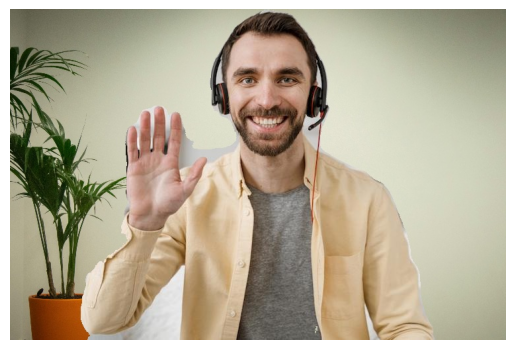

In [ ]:
plt.imshow(cv2.imread("Images/parallel_bg.jpg")[...,::-1]);
plt.axis('off');

### ƒê√°nh gi√°

#### ƒê·ªô ch√≠nh x√°c

K·∫øt qu·∫£ ƒë∆∞·ª£c feedforward h√¨nh qua m√¥ h√¨nh UNET song song:



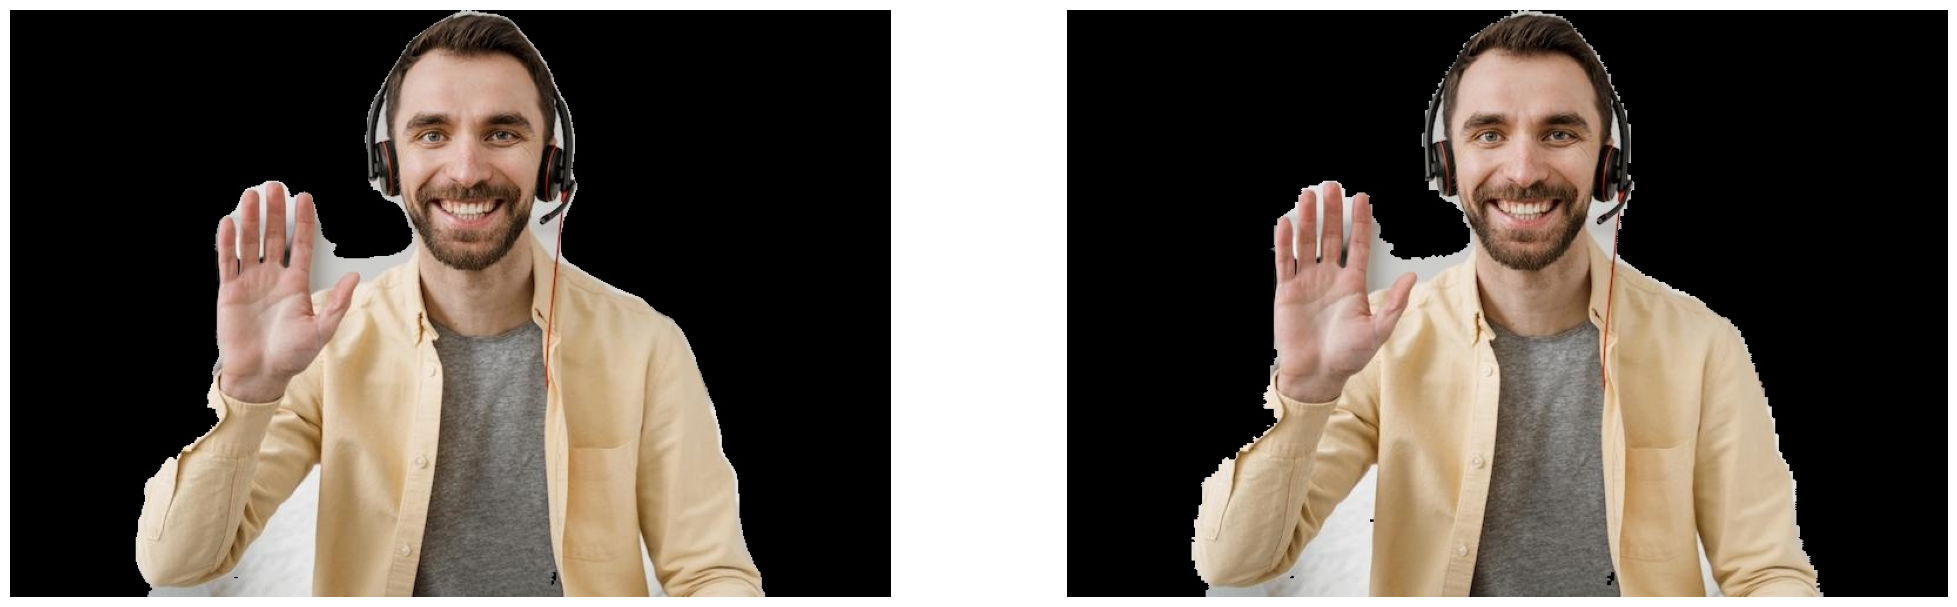

In [ ]:
list_images = [cv2.imread("Images/parallel.jpg")[...,::-1],
               cv2.imread("Images/unet.jpg")[...,::-1]]
fig = plt.figure(figsize=(25, 20))
fig.add_subplot(1, 2, 1)

# showing image
plt.imshow(list_images[0]);
plt.axis('off');

# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)

# showing image
plt.imshow(list_images[1]);
plt.axis('off');

In [ ]:
np.abs(list_images[0] - list_images[1]).mean()

np.float64(4.206027555555556)

##### **Nh·∫≠n x√©t v·ªÅ h√¨nh ·∫£nh ƒë·∫ßu ra**

> Gi√° tr·ªã sai kh√°c trung b√¨nh gi·ªØa hai ·∫£nh ƒë·∫ßu ra l√† kho·∫£ng **4.21**. M·∫∑c d√π con s·ªë n√†y kh√°c 0, cho th·∫•y c√≥ s·ª± kh√°c bi·ªát nh·∫•t ƒë·ªãnh ·ªü m·ª©c pixel, nh∆∞ng v·ªÅ m·∫∑t tr·ª±c quan, hai ·∫£nh v·∫´n tr√¥ng kh√° gi·ªëng nhau.

> ƒêi·ªÅu n√†y c√≥ th·ªÉ do sai kh√°c ch·ªâ n·∫±m ·ªü c√°c chi ti·∫øt nh·ªè ho·∫∑c nhi·ªÖu kh√¥ng ƒë√°ng k·ªÉ, n√™n m√¥ h√¨nh tu·∫ßn t·ª± v√† U-Net v·∫´n c√≥ th·ªÉ xem l√† cho k·∫øt qu·∫£ ƒë·∫ßu ra t∆∞∆°ng ƒë∆∞∆°ng trong b·ªëi c·∫£nh ·ª©ng d·ª•ng c·ª• th·ªÉ.

#### Th·ªùi gian ch·∫°y

In [ ]:
pd.DataFrame(list(zip(func, time_compile_parallel, time_run_parallel, time_unet_parallel)),
               columns =['Name', 'Compile+Run(s)', 'Run(s)', 'Unet(s)']).sort_values(by=['Unet(s)'], ascending=False)

Name  Compile+Run(s)    Run(s)   Unet(s)
3            Conv2D        0.393223  0.100482  8.937037
5        Batch Norm        0.185651  0.050953  0.799502
4  Conv2D Transpose        0.407776  0.139195  0.625711
0              Relu        1.343581  0.055806  0.510746
6            Concat        0.218958  0.112573  0.335975
2         Maxpool2D        0.231359  0.023562  0.250717
1           Sigmoid        0.180150  0.054537  0.133589

In [ ]:
print("T·ªïng th·ªùi gian ch·∫°y FFW song song: ", round(time_unet_parallel.sum(), 6), '(s)')

T·ªïng th·ªùi gian ch·∫°y FFW song song:  11.593277 (s)


##### **So s√°nh v·ªõi ch·∫°y tu·∫ßn t·ª±**

In [ ]:
pd.DataFrame(list(zip(func, time_compile, time_run, time_unet)),
               columns =['Name', 'Compile+Run(s)', 'Run(s)', 'Unet(s)']).sort_values(by=['Unet(s)'], ascending=False)

Name  Compile+Run(s)    Run(s)     Unet(s)
3            Conv2D        2.995303  0.226348  194.466223
4  Conv2D Transpose        5.003023  2.787867   10.610607
6            Concat        0.585413  0.323015    0.880779
5        Batch Norm        0.218670  0.039223    0.832610
2         Maxpool2D        0.914595  0.079484    0.713382
0              Relu        0.826896  0.014145    0.316134
1           Sigmoid        0.215732  0.060376    0.125582

In [ ]:
print("T·ªïng th·ªùi gian ch·∫°y FFW tu·∫ßn t·ª±: ", round(time_unet.sum(), 6), '(s)')

T·ªïng th·ªùi gian ch·∫°y FFW tu·∫ßn t·ª±:  207.945316 (s)


##### **So s√°nh th·ªùi gian th·ª±c thi tu·∫ßn t·ª± v√† song song h√≥a**
* T·ªïng th·ªùi gian ch·∫°y tu·∫ßn t·ª±: **207.95 gi√¢y**

* T·ªïng th·ªùi gian ch·∫°y song song: **11.59 gi√¢y**
‚Üí Th·ªùi gian gi·∫£m m·∫°nh g·∫ßn **18 l·∫ßn** nh·ªù song song h√≥a.

* C√°c l·ªõp Conv2D v√† Conv2D Transpose l√† th√†nh ph·∫ßn ti√™u t·ªën th·ªùi gian nh·∫•t trong m√¥ h√¨nh tu·∫ßn t·ª± (chi·∫øm h∆°n 95% t·ªïng th·ªùi gian).

* Khi song song h√≥a, th·ªùi gian th·ª±c thi c·ªßa c√°c l·ªõp n√†y gi·∫£m r√µ r·ªát, ƒë·∫∑c bi·ªát l√† Conv2D (t·ª´ ~194s c√≤n ~9s).

**K·∫øt lu·∫≠n:** Song song h√≥a gi√∫p gi·∫£m ƒë√°ng k·ªÉ th·ªùi gian ch·∫°y c·ªßa m√¥ h√¨nh U-Net, ƒë·∫∑c bi·ªát hi·ªáu qu·∫£ ·ªü c√°c l·ªõp t√≠nh to√°n n·∫∑ng nh∆∞ Conv2D. M·ªôt s·ªë layer ph·ª• (ReLU, Sigmoid...) c√≥ th·ªÉ kh√¥ng ƒë∆∞·ª£c l·ª£i qu√° nhi·ªÅu, nh∆∞ng t·ªïng th·ªùi gian v·∫´n gi·∫£m m·∫°nh.